# Libraries that we will use

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from ipywidgets import interact
import os


# Reading the instance 

Ta al revés asi que tengo q cambiarlo

In [11]:
#First we will read an instance to turn it into a 3d matrix.
yard = None #Matrix of the yard (bays, rows, height)
n_bays = None
n_rows = None
max_height = None
plots = []

random_instances = os.listdir("Random")
random_paths =  [f"Random/{name}" for name in random_instances]

#Some params to change colors
default_color = "deepskyblue"
extraction_color = "seagreen"
relocation_origin_color = "salmon"
relocation_destiny_color = "goldenrod"

In [12]:
def read_instance(path):
    #Modificaremos las variables gloables
    global yard, n_bays, n_rows, max_height


    f = open(path, 'r')
    title = f.readline()

    #Separamos cada parámetro del título
    params = title.strip().split()
    n_bays = int(params[1])
    n_rows = int(params[2])
    max_height = int(params[3])

    print(max_height)

    #Creamos la matríz 
    yard = np.zeros(shape=(n_bays, n_rows, max_height), dtype=int)

    print(yard.shape)

    #Rellenamos la información con la instancia
    for line in f:
        data = line.strip().split()
        actual_bay = int(data[0])-1
        actual_row = int(data[1])-1

        n_containers_stack = int(data[2])

        #Procesamos todos los containers
        i = 4
        count = 0
        while (count < n_containers_stack):
            yard[actual_bay, actual_row, count] = int(data[i])
            count += 1
            i += 2

In [13]:
def show_instance():

    fig = plt.figure(figsize=((n_bays+1)*5, 10)) 
    fig.subplots_adjust(hspace=0.5)

    #Creamos una grilla para que arriba esté el plot en 3d y abajo cada bahía
    ratios = np.ones(n_bays+1)
    ratios[0] = 2
    gs = gridspec.GridSpec(n_bays+1, 1, height_ratios=ratios)

    # ------------ Top plot ------------- 
    #Creamos grafico 3d
    ax_top = fig.add_subplot(gs[0,0], projection='3d')

    for x in range(n_bays):
        for y in range(n_rows):
            for z in range(max_height):

                #Obtenemos el id del container y lo graficamos si es mayor a 0
                id = yard[x, y, z]
                if id > 0:

                    #Dibujamos un cubo en esas coordenadas
                    ax_top.bar3d(x, y, z, 1, 1, 1, color=default_color, edgecolor="black", alpha = 0.7)

    #Añadimos los ejes
    ax_top.set_xticks([0, n_bays])
    ax_top.set_yticks([0, n_rows])
    ax_top.set_zticks([0, max_height])

    ax_top.set_xlabel("Bays (X)")
    ax_top.set_ylabel("Rows (Y)")
    ax_top.set_zlabel("Tier (Z)")

    #Cambiamos la ubicación de la cámara
    #ax_top.view_init(elev=30, azim=30)

    #------------- Show bays ----------------
    for bay in range(0, n_bays):

        ax_1 = fig.add_subplot(gs[bay+1, 0])

        #Agregamos rectangulos
        for i in range(n_rows):
            for j in range(max_height):
                value = yard[bay, i, j]

                #Si existe un container ahi entonces lo dibujamos
                if value > 0:
                    rect = Rectangle( (i,j), 1, 1, edgecolor="black", facecolor=default_color)
                    ax_1.add_patch(rect)
                    ax_1.text(i+0.5 ,j+0.5, str(value), ha='center', va='center', fontsize=10)

        #Agregamos los ejes
        ax_1.set_xlim(0, n_rows)
        ax_1.set_ylim(0, max_height)
        ax_1.set_ylabel("TIER (Z)")
        ax_1.set_title("BAY {}".format(bay))
        ax_1.set_facecolor((0, 0, 0, 0.08))

    plots.append(plt.gcf())
    plt.show()
    return None

6
(2, 3, 6)


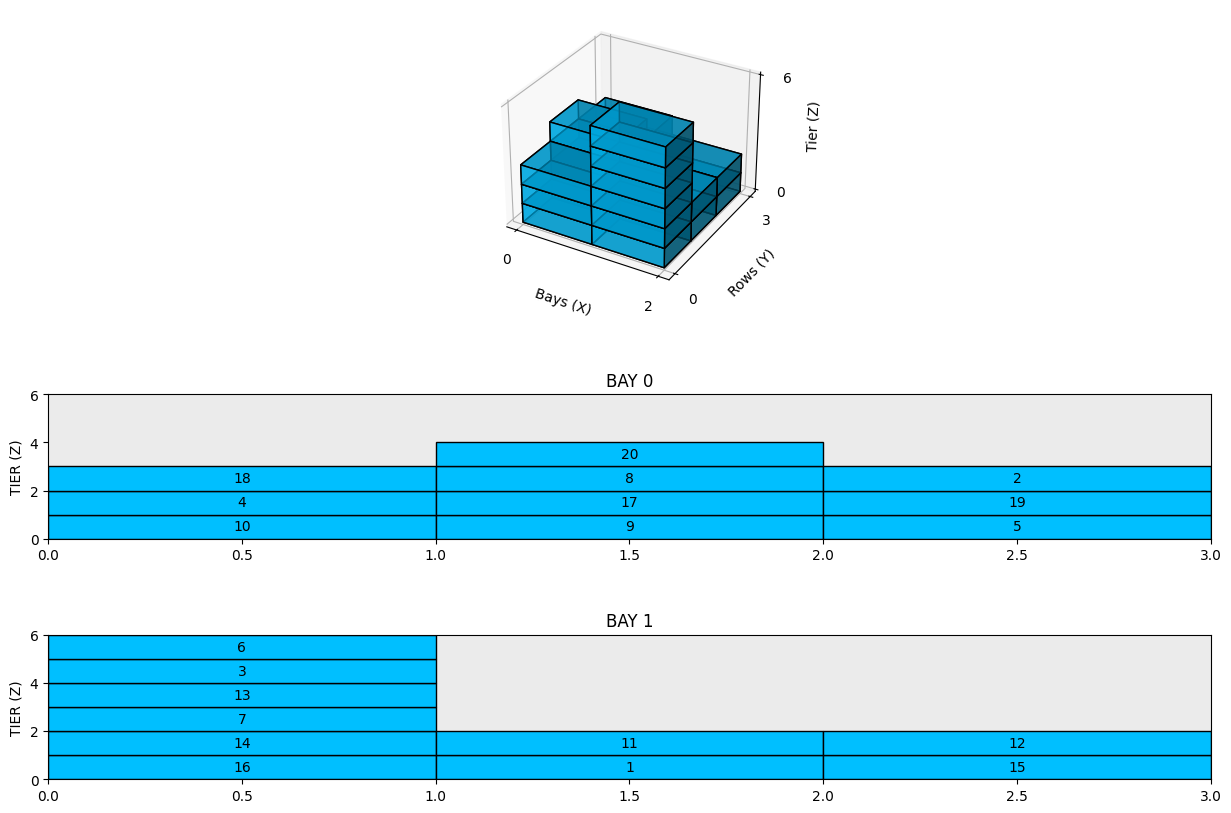

In [14]:
read_instance(random_paths[10])
show_instance()

# Showing the solution 

To test we used the 10th path of all instances availables and created a random solution


Se considera que los stacks se numeran desde la bahía 0 row 0.

In [15]:
def plot_move(tuple):
    container_id, origin, destiny = tuple

    row_origin = origin%n_rows #No se ocupa pq se ocupa el id del contenedor 
    bay_origin = origin//n_rows
    tier_origin = 0

    row_destiny = destiny%n_rows
    bay_destiny = destiny//n_rows
    tier_destiny = -1

    extracion = False


    #Creamos el gráfico
    fig = plt.figure(figsize=(15, 10)) 
    fig.subplots_adjust(hspace=0.5)

    #Añadimos la descripción del movimiento
    s = "MOVE: " + str(container_id) + " " + str(origin) + " "+ str(destiny)
    fig.text(0.5, 1.02, s, ha='center', va='top', fontsize=10)

    #Creamos una grilla para que arriba esté el plot en 3d y abajo las bahías
    ratios = np.ones(n_bays+1)
    ratios[0] = 2

    #Creamos en el gráfico en 3d
    gs = gridspec.GridSpec(n_bays+1, 1, height_ratios=ratios)


    #Creamos el gráfico en 3d 
    ax_top = fig.add_subplot(gs[0, 0], projection='3d')


    #Ahora agregamos los cubos (por cambiar)
    for x in range(n_bays):
        for y in range(n_rows):
            for z in range(max_height):

                #Obtenemos el id y vemos si cuadra con el que estamos extrallendo
                id = yard[x, y , z]
                    
                #Valores default
                alpha = 0.8
                color = default_color

                #Si hay un cubo lo dibujamos
                if id > 0:
                    #Si se extrae
                    if id == container_id and destiny == -1:
                        alpha = 1
                        color = extraction_color
                        tier_origin = z 
                        extracion = True

                    #Si se relocaliza
                    if id == container_id and destiny != -1:
                        alpha = 1
                        color = relocation_origin_color
                        tier_origin = z
                    
                    ax_top.bar3d(x, y, z, 1, 1, 1, color=color, edgecolor="black", alpha=alpha)


    #En caso que sea una relocalización entonces tenemos que crear un cubo en el destino
    values_row = yard[bay_destiny, row_destiny, :]
    tier_destiny = 0

    #Buscamos el tope
    for value in values_row:
        if value == 0:
            break
        tier_destiny +=1

    if destiny != -1:
        ax_top.bar3d(bay_destiny, row_destiny, tier_destiny,1, 1, 1, edgecolor="black", facecolor=relocation_destiny_color)

    #Añadimos los ejes
    ax_top.set_xticks([0, n_bays])
    ax_top.set_yticks([0, n_rows])
    ax_top.set_zticks([0, max_height])

    ax_top.set_xlabel("Bays (X)")
    ax_top.set_ylabel("Rows (Y)")
    ax_top.set_zlabel("Tier (Z)")

    # ----------------- Plot de bahías -----------------
    for bay in range(n_bays):

        ax_1 = fig.add_subplot(gs[bay+1, 0])

        #Agregamos rectángulos
        for i in range(n_rows):
            for j in range(max_height):
                id = yard[bay, i, j]

                #Si existe un container ahi entonces lo dibujamos
                if id > 0:
                    color = default_color
                    #Si se extrae
                    if id == container_id and destiny == -1:
                        color = extraction_color          

                    #Si se relocaliza
                    if id == container_id and destiny != -1:
                        color = relocation_origin_color   

                    rect = Rectangle( (i,j), 1, 1, edgecolor="black", facecolor=color)
                    ax_1.add_patch(rect)
                    ax_1.text(i+0.5 ,j+0.5, id, ha='center', va='center', fontsize=10)


        #Agregamos otro rectangulo si es que es relocalización
        if destiny != -1:
            if bay == bay_destiny:

                index = 0
                #Buscamos el top
                for value in values_row:
                    if value == 0:
                        break
                    index+=1


                rect = Rectangle( (row_destiny,index), 1, 1, edgecolor="black", facecolor=relocation_destiny_color)
                ax_1.add_patch(rect)

    

        #Agregamos los límites
        ax_1.set_xlim(0, n_rows)
        ax_1.set_ylim(0, max_height)
        ax_1.set_ylabel("TIER (Z)")
        ax_1.set_title("Bay:{}".format(bay))
        ax_1.set_facecolor((0, 0, 0, 0.08))

    plots.append(plt.gcf())
    params = ((bay_origin, bay_destiny), (row_origin, row_destiny), (tier_origin, tier_destiny), extracion)   
    return params





In [16]:
#Ahora una función para hacer el movimiento (modificar el yard)
def make_move(params):
    global yard

    #Separamos en origen y destino
    f_bays = params[0]
    f_rows = params[1]
    f_tiers = params[2]
    f_extraction = params[3]

    b_o, b_d = f_bays
    r_o, r_d = f_rows
    t_o, t_d = f_tiers

    id_f = yard[b_o, r_o, t_o]
    yard[b_o, r_o, t_o] = 0
    
    #Si no es una extración entonces tenemos que cambiar tambien el de destino
    if not f_extraction:
        yard[b_d, r_d, t_d] = id_f


    

In [17]:
read_instance(random_paths[10])

6
(2, 3, 6)


6
(2, 3, 6)


C:\Users\basti\AppData\Local\Temp\ipykernel_31960\1368018911.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(15, 10))


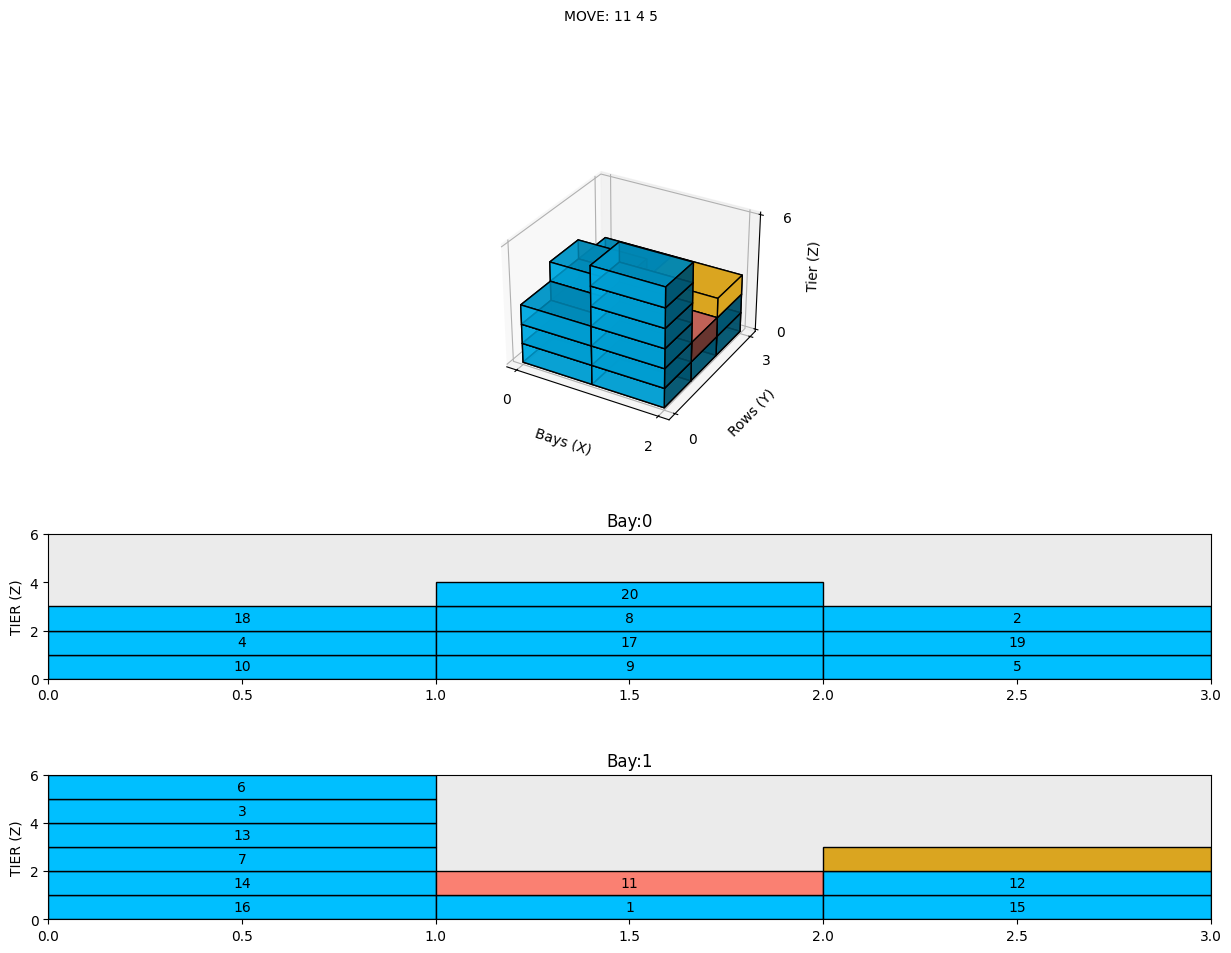

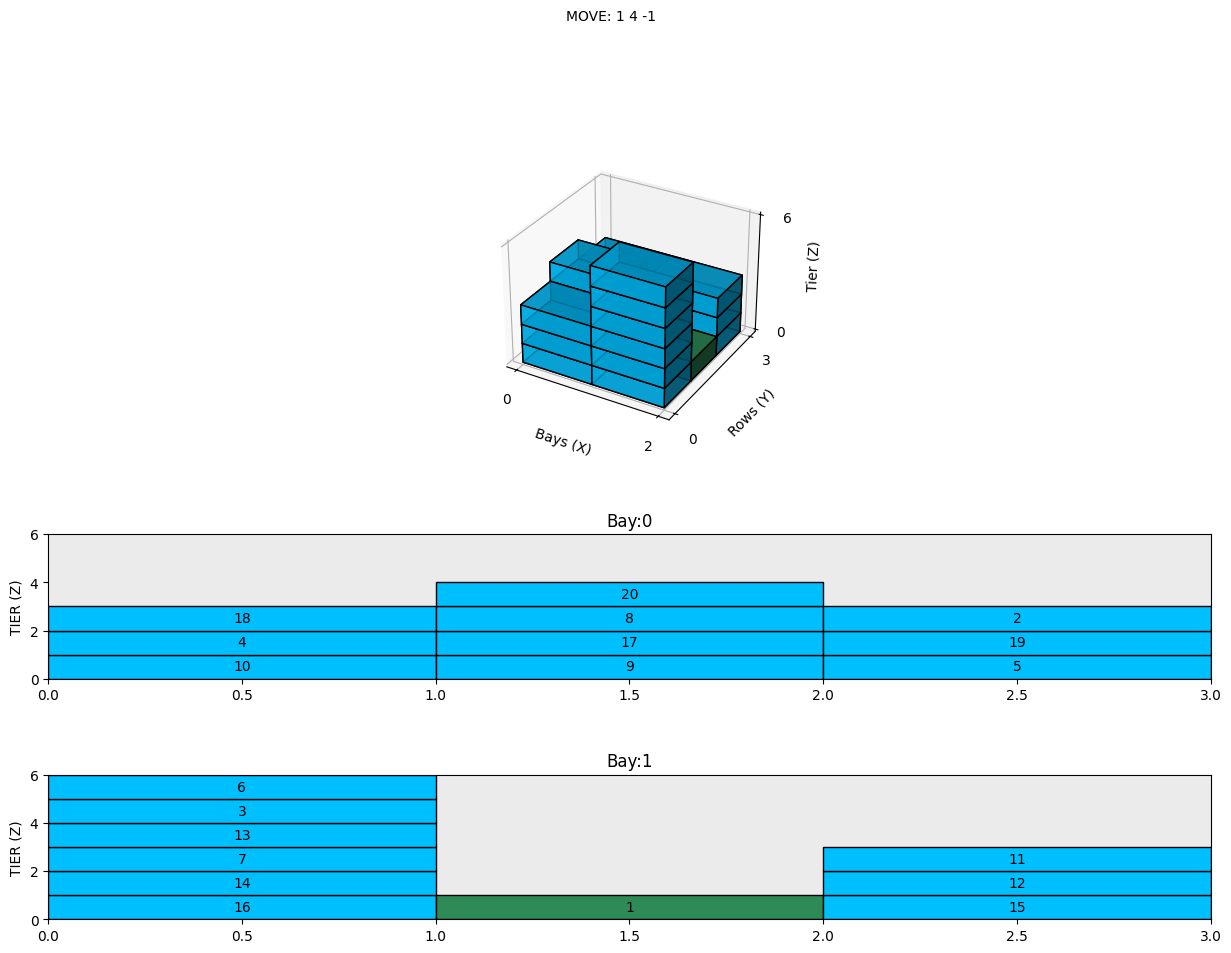

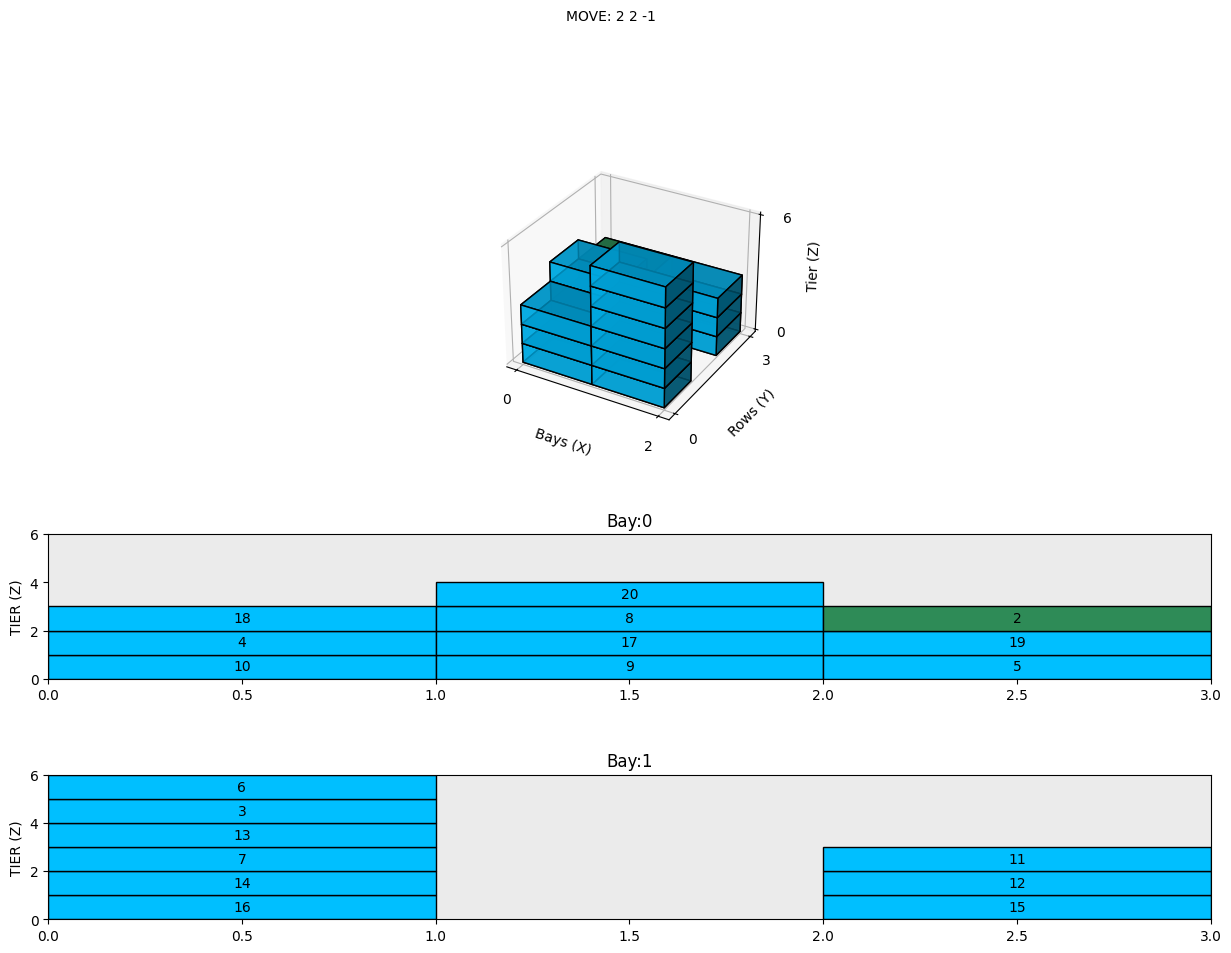

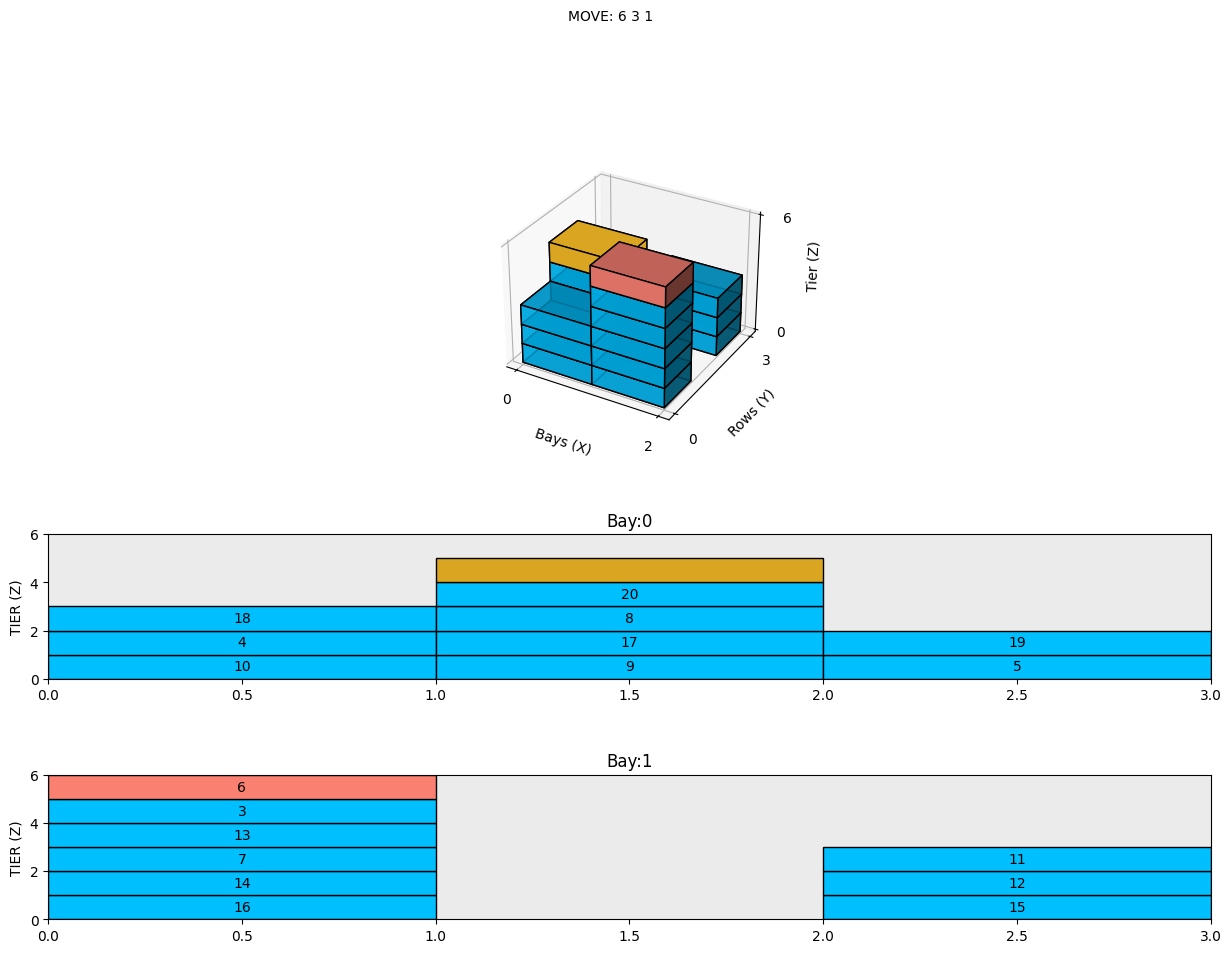

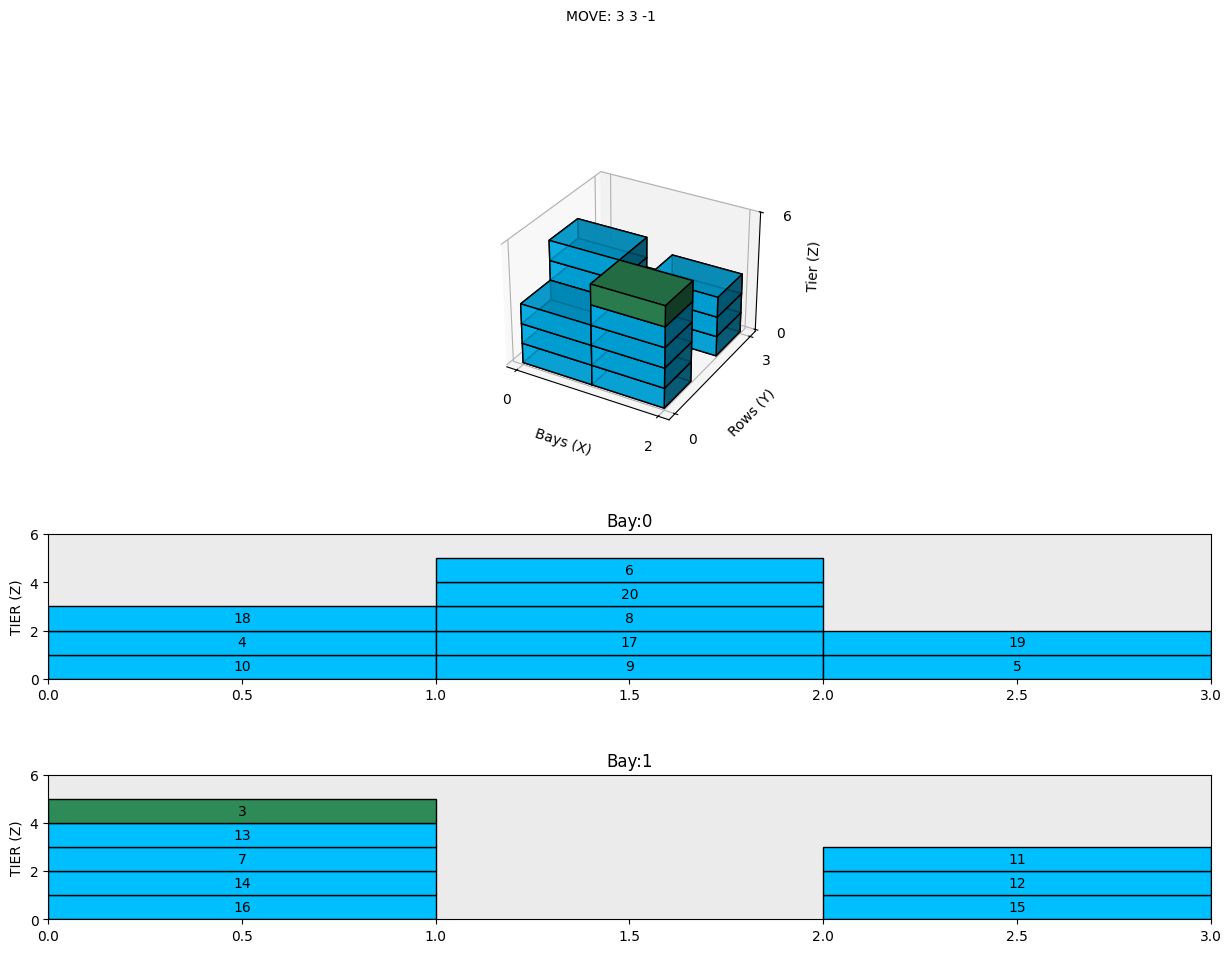

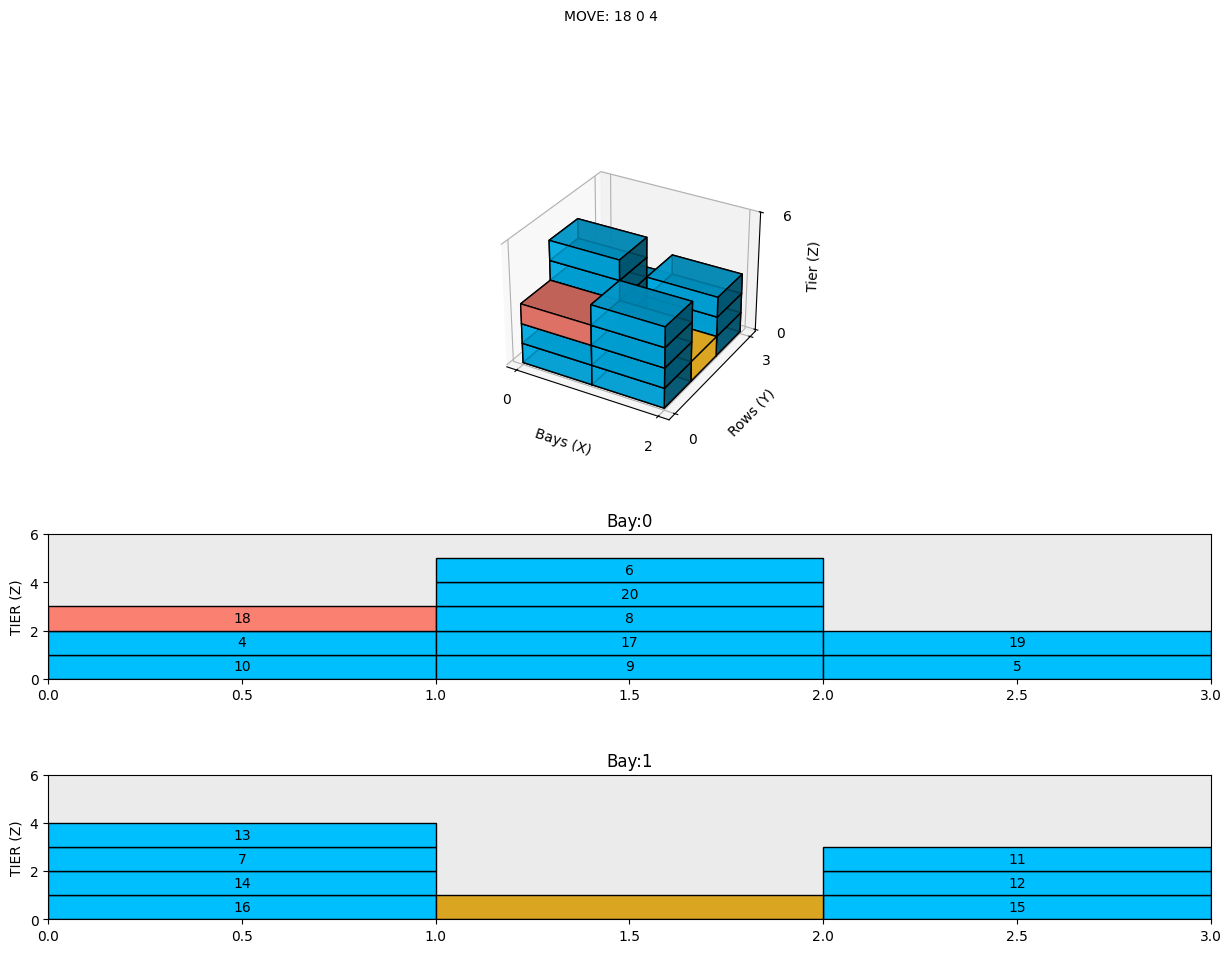

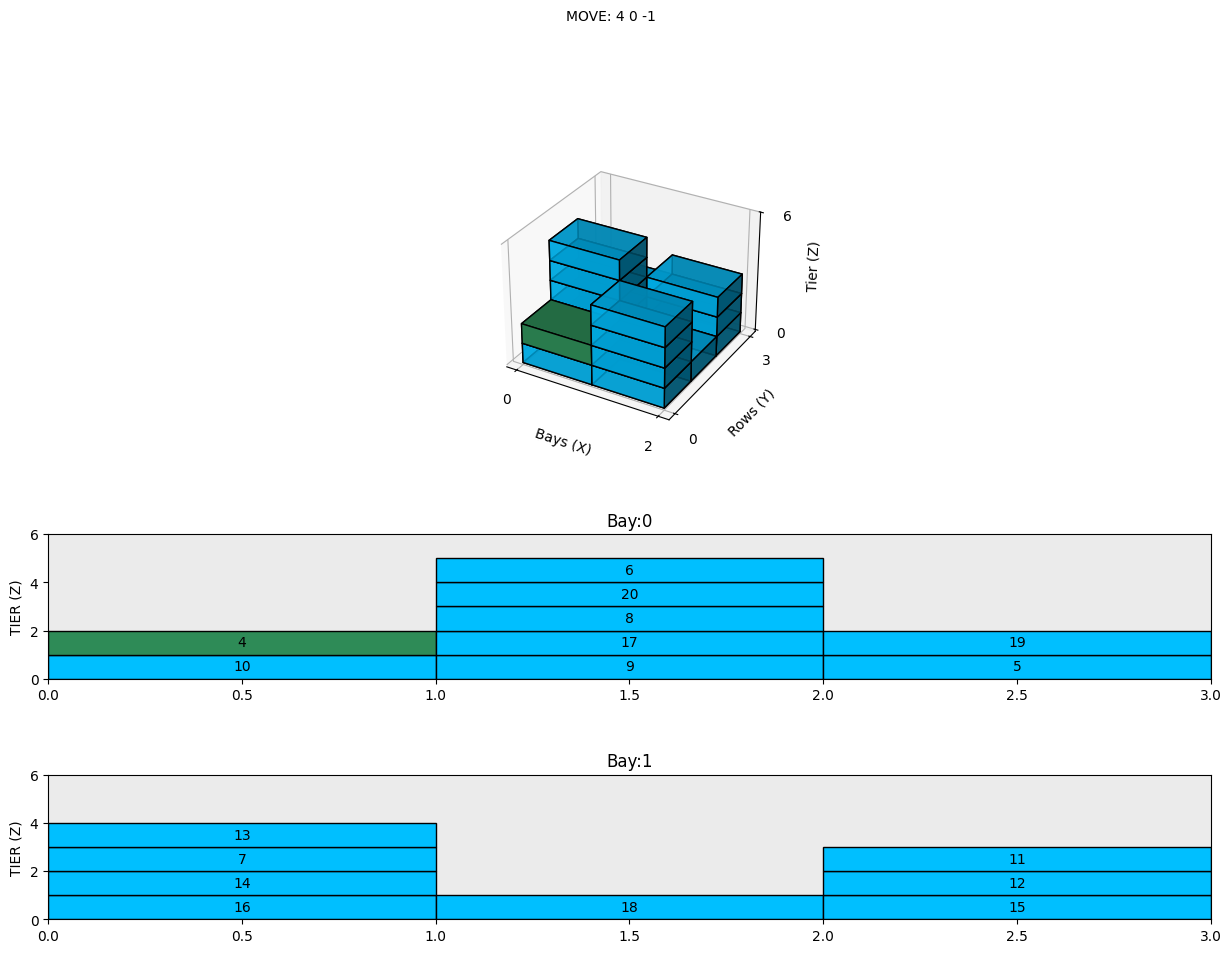

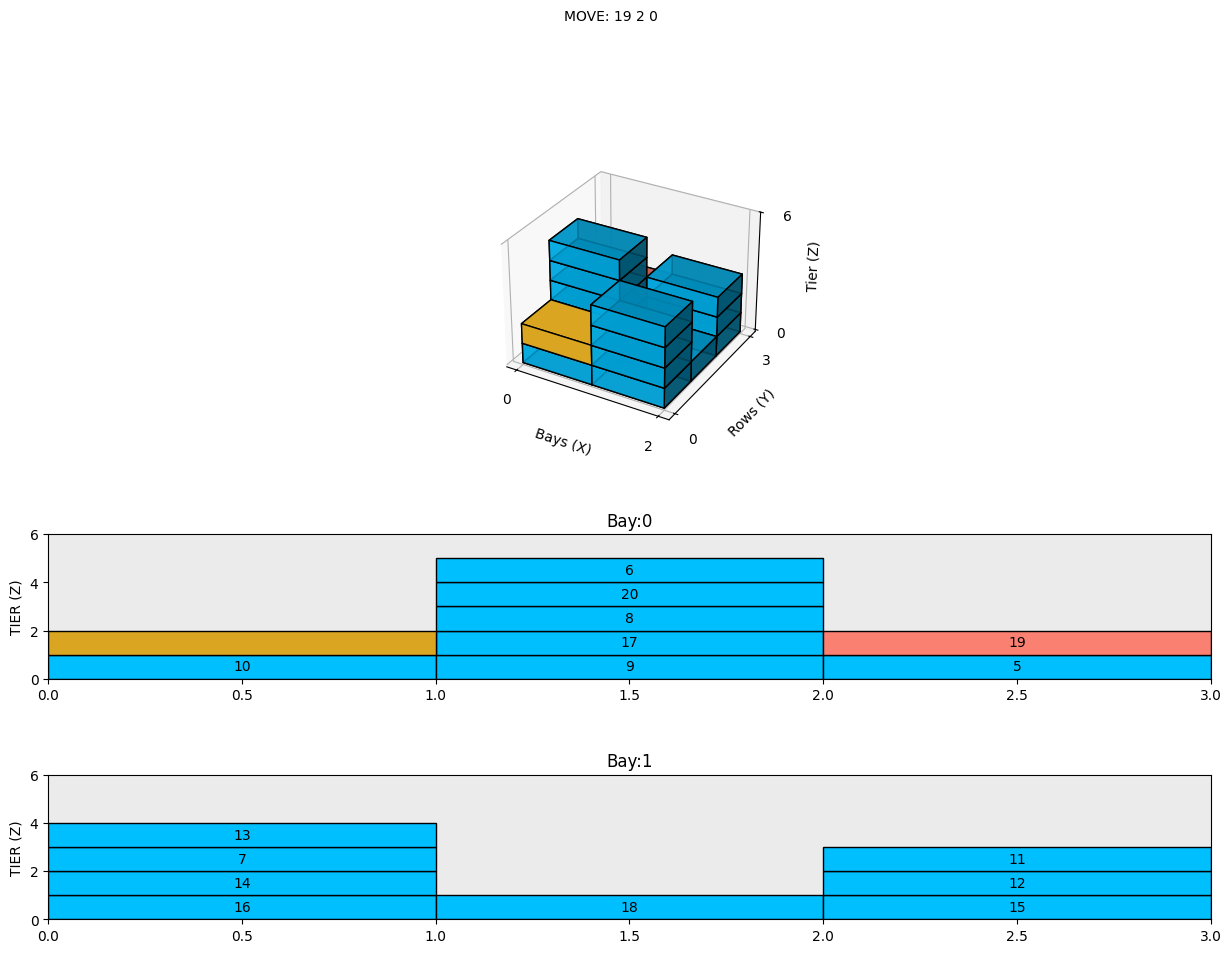

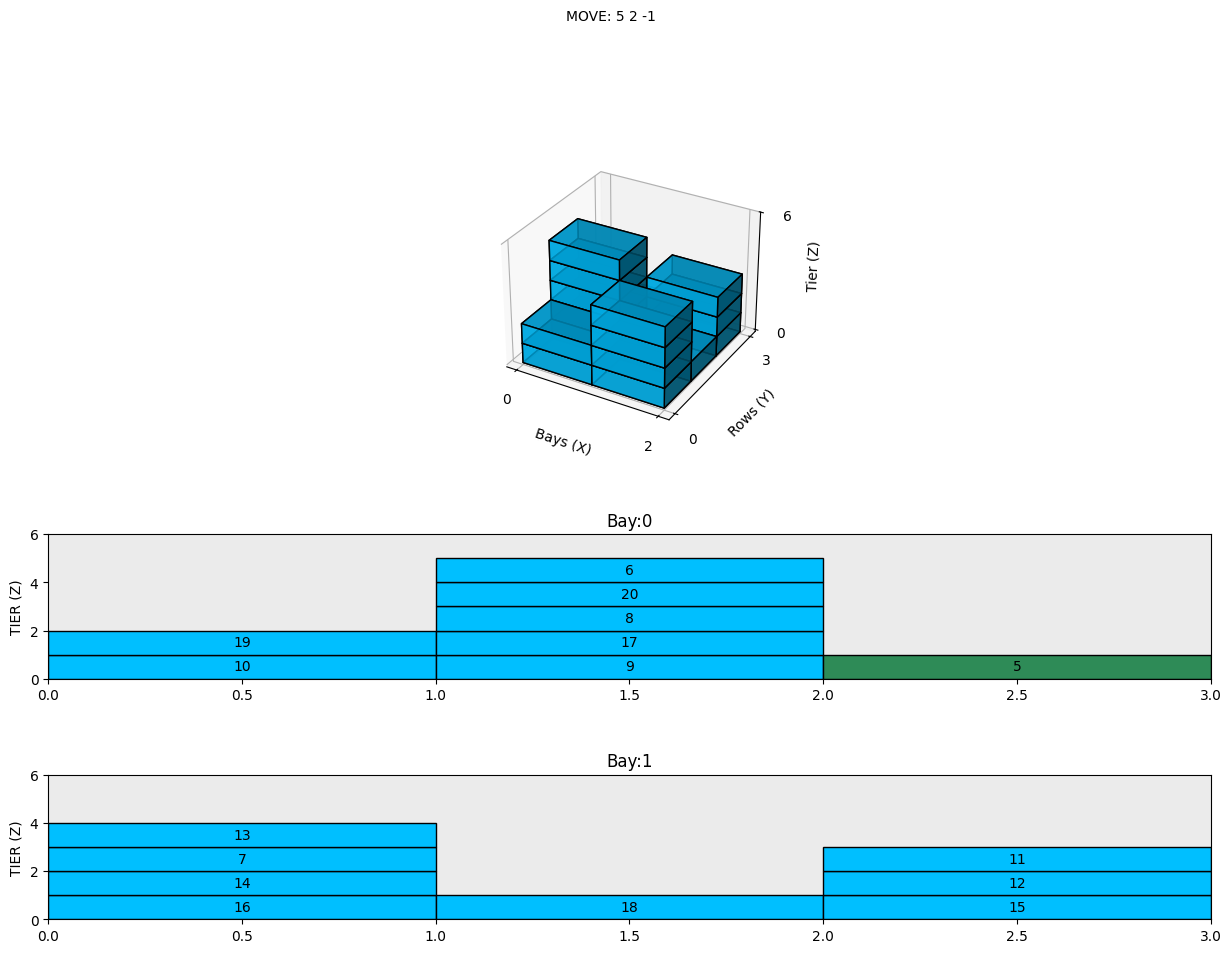

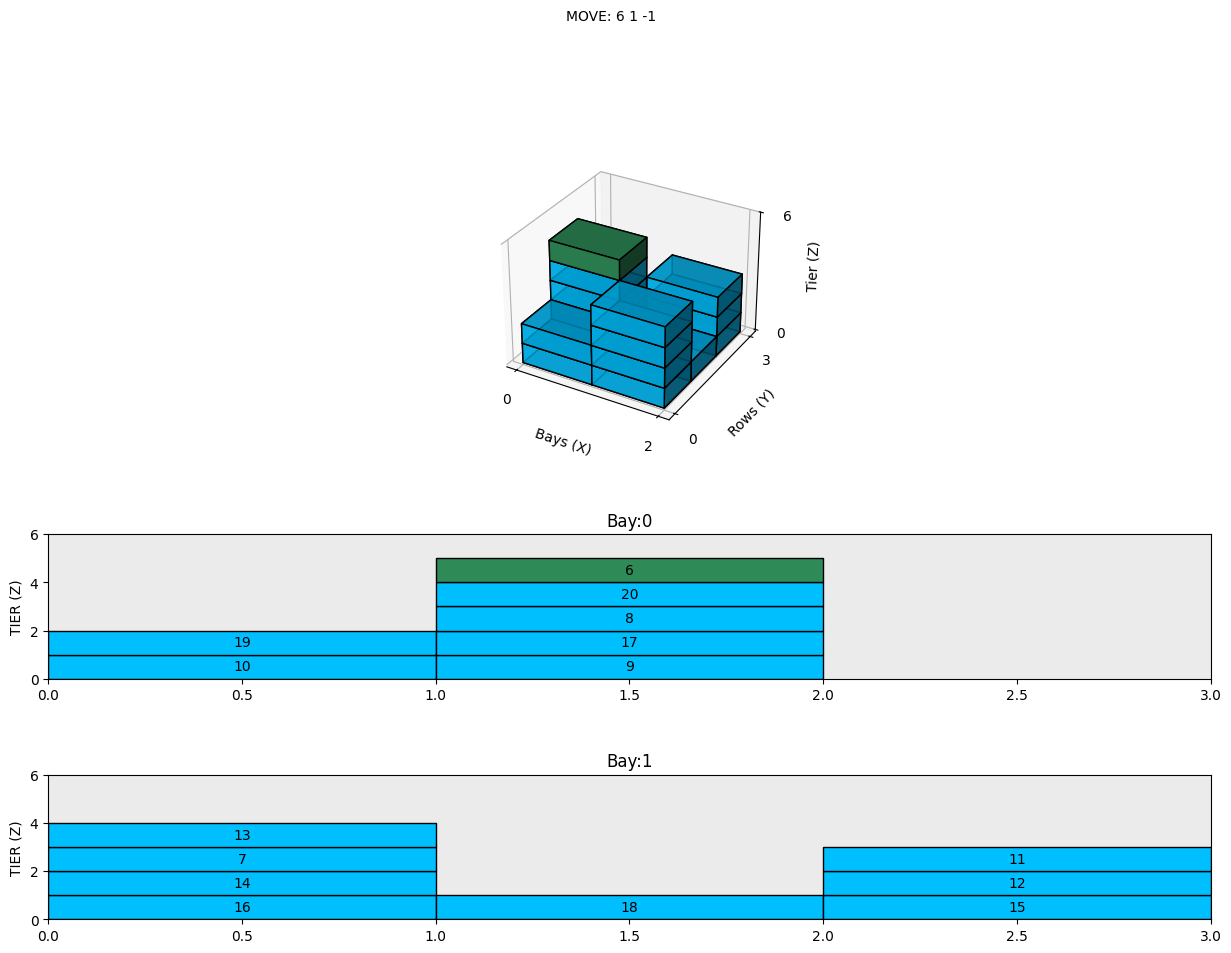

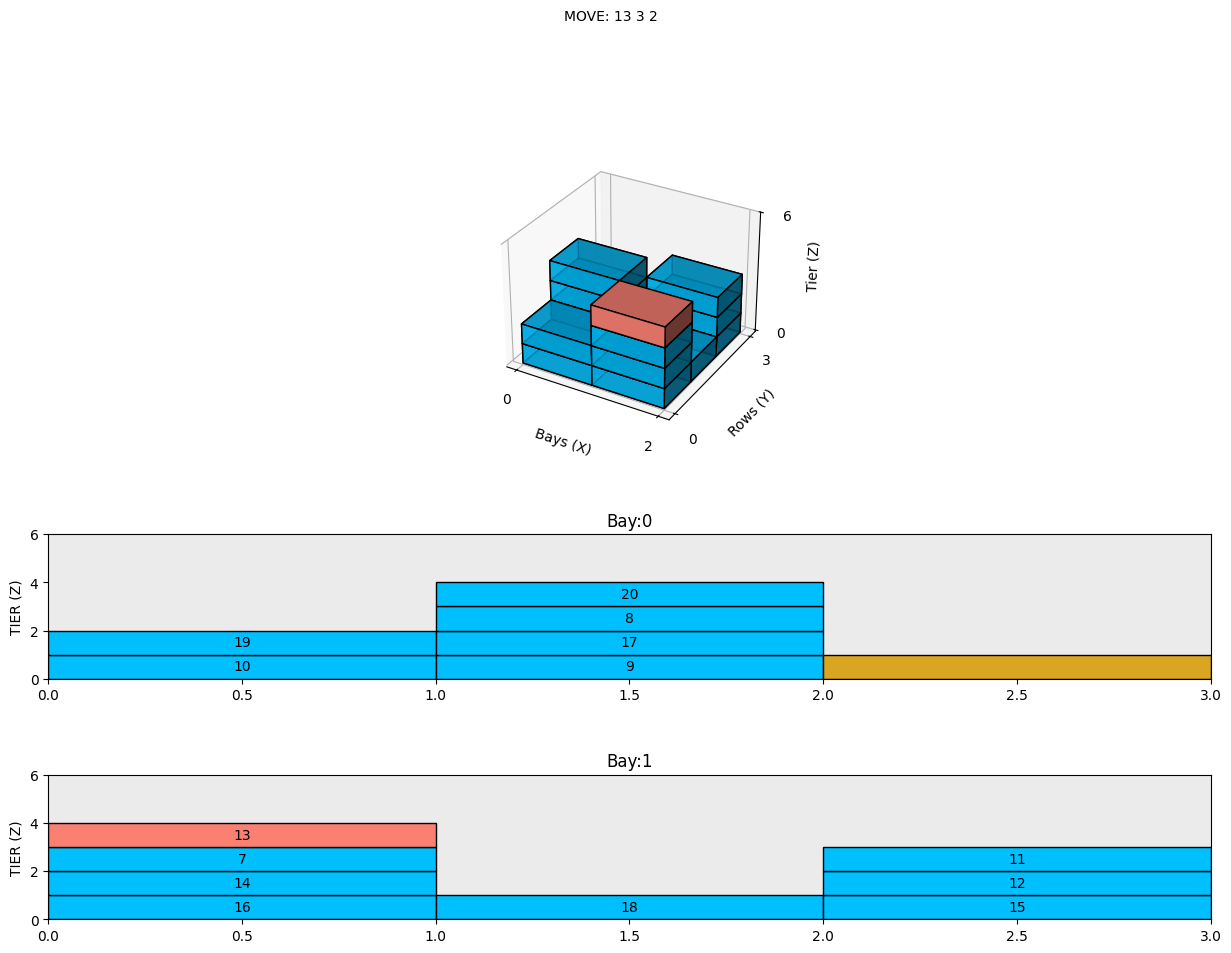

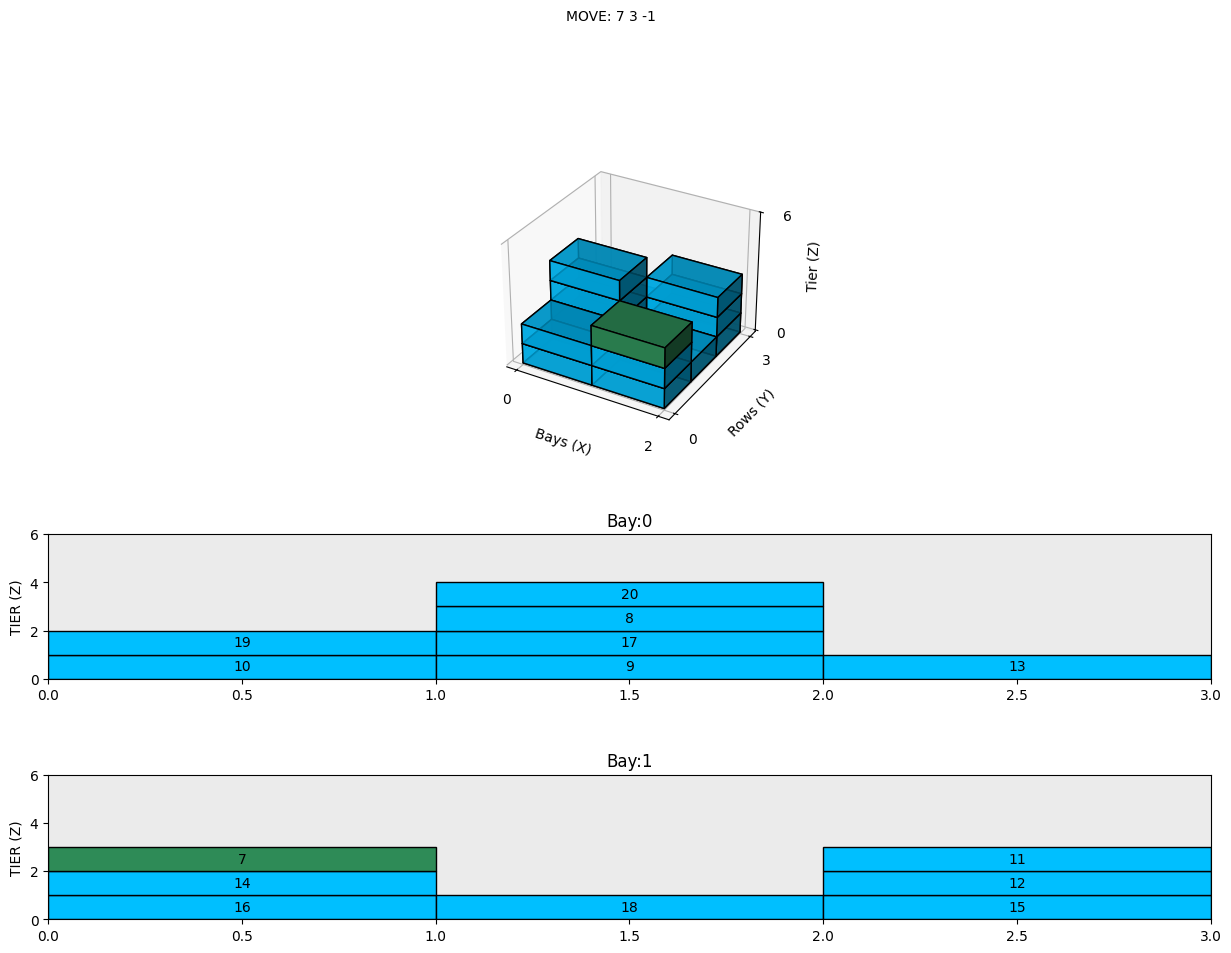

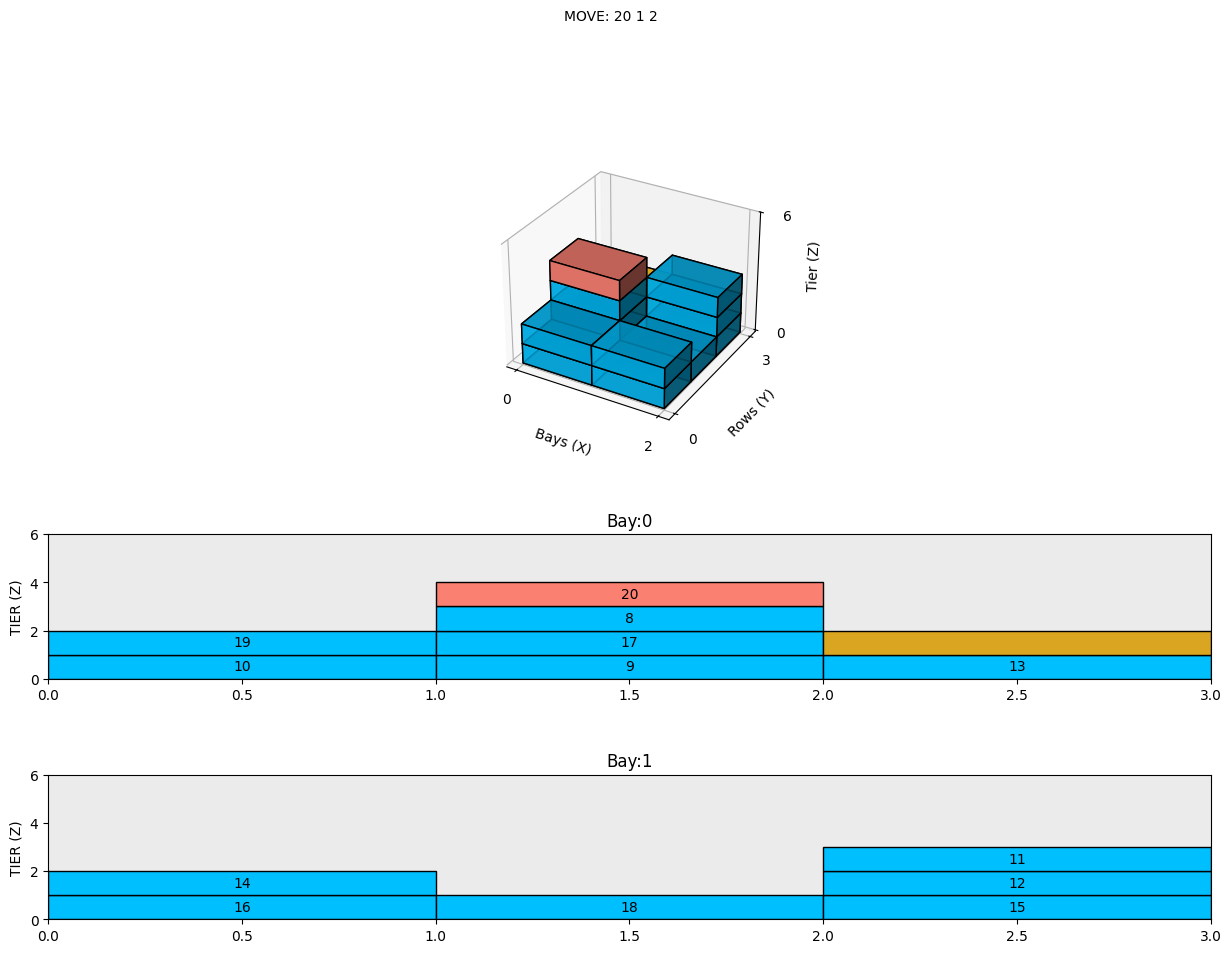

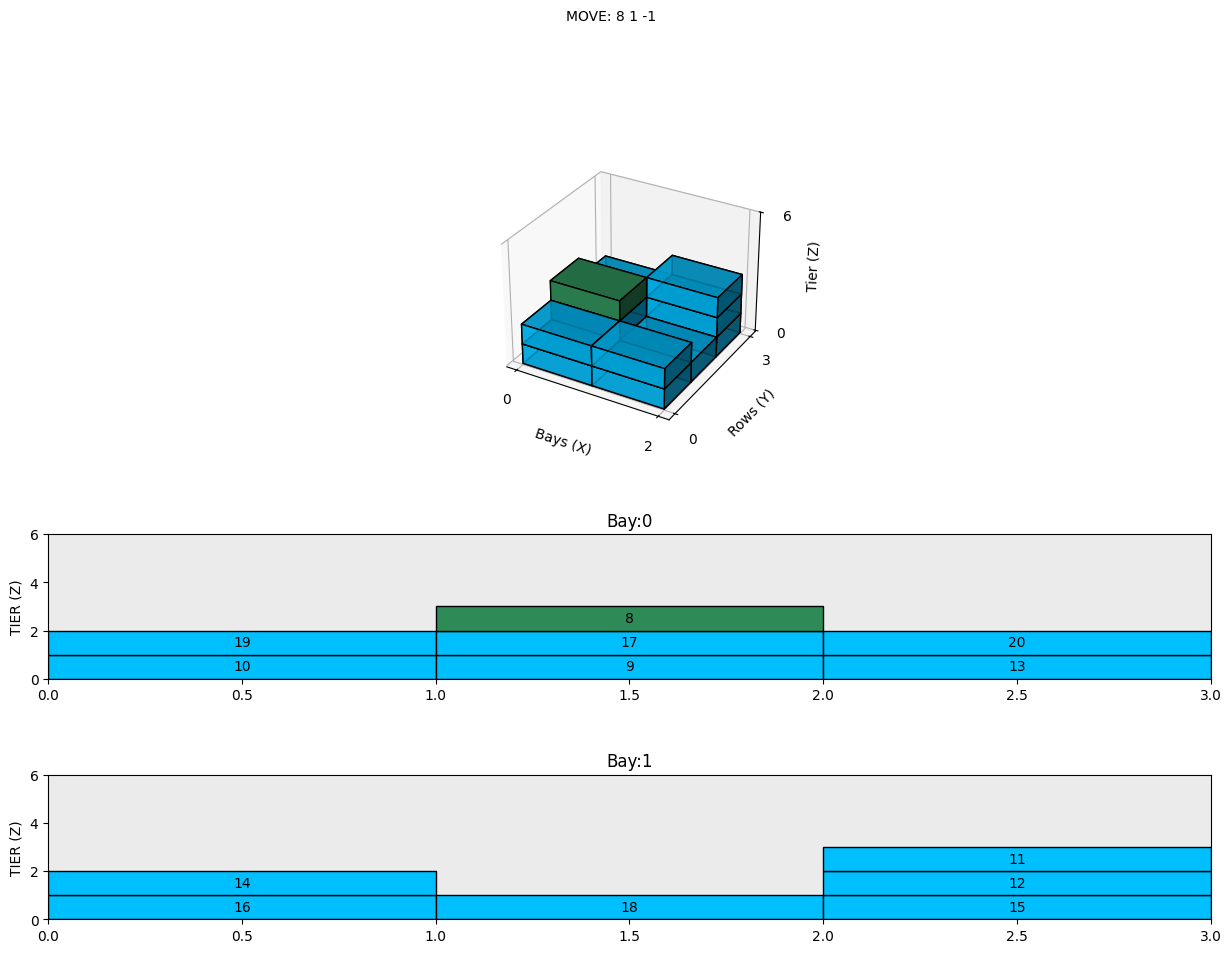

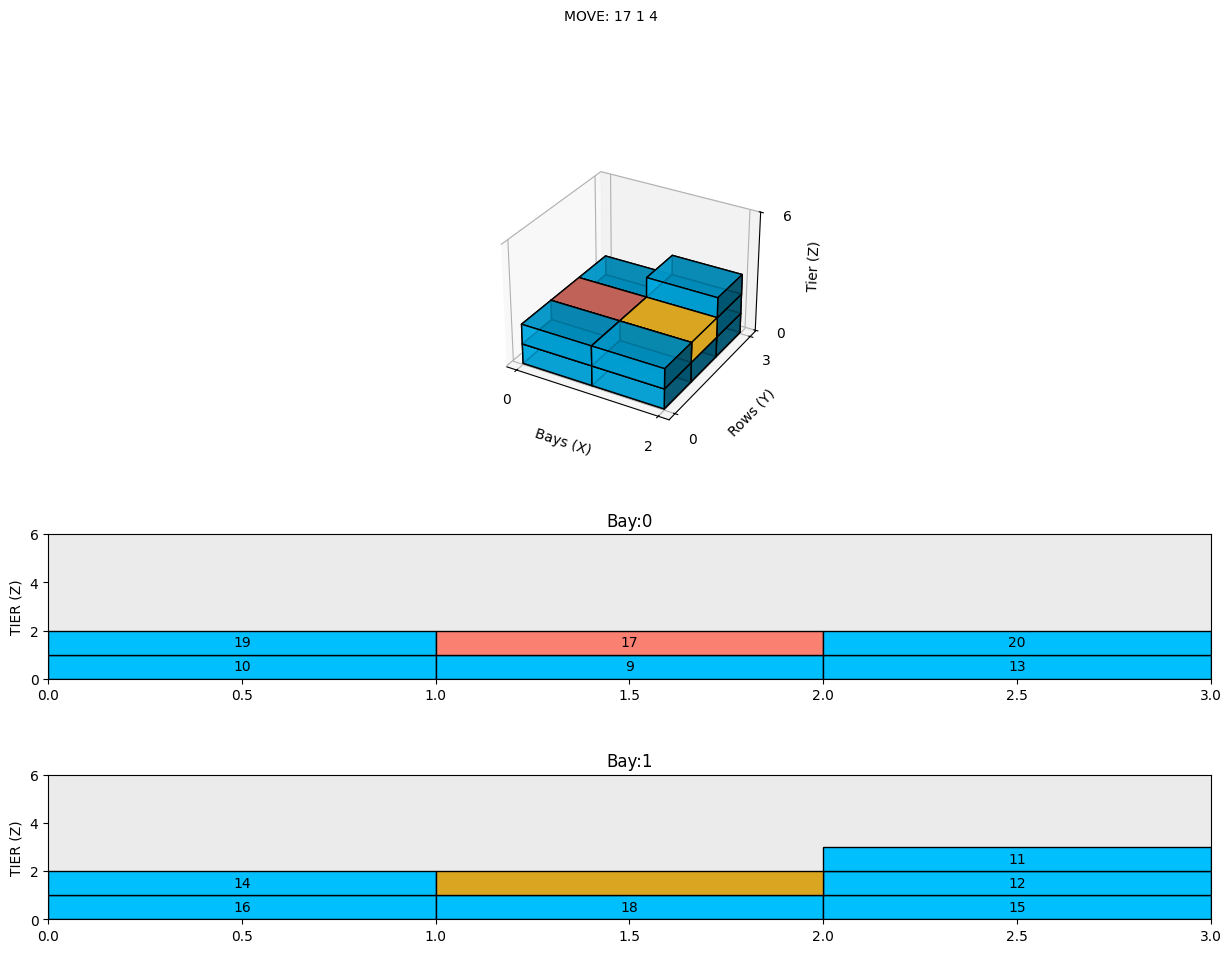

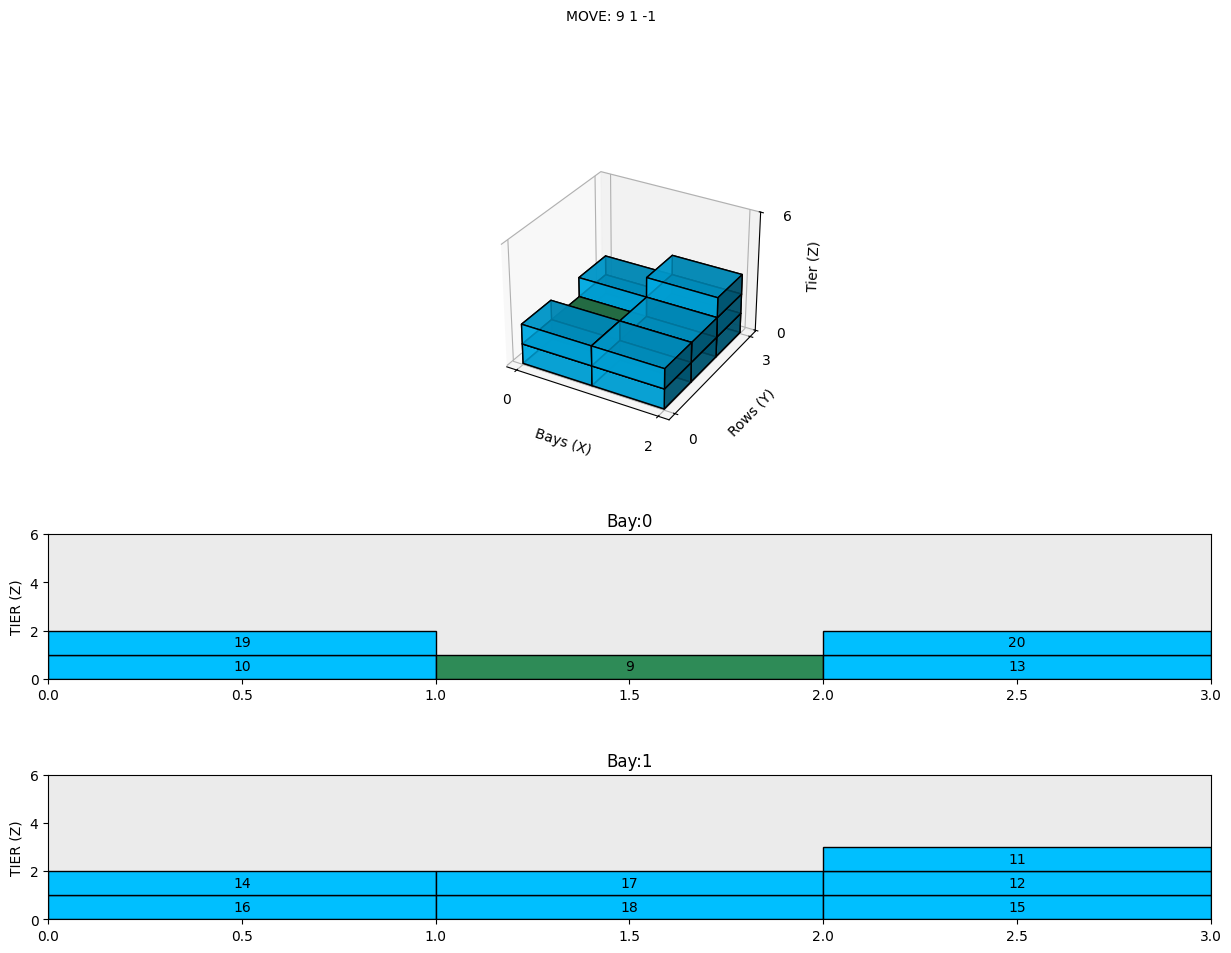

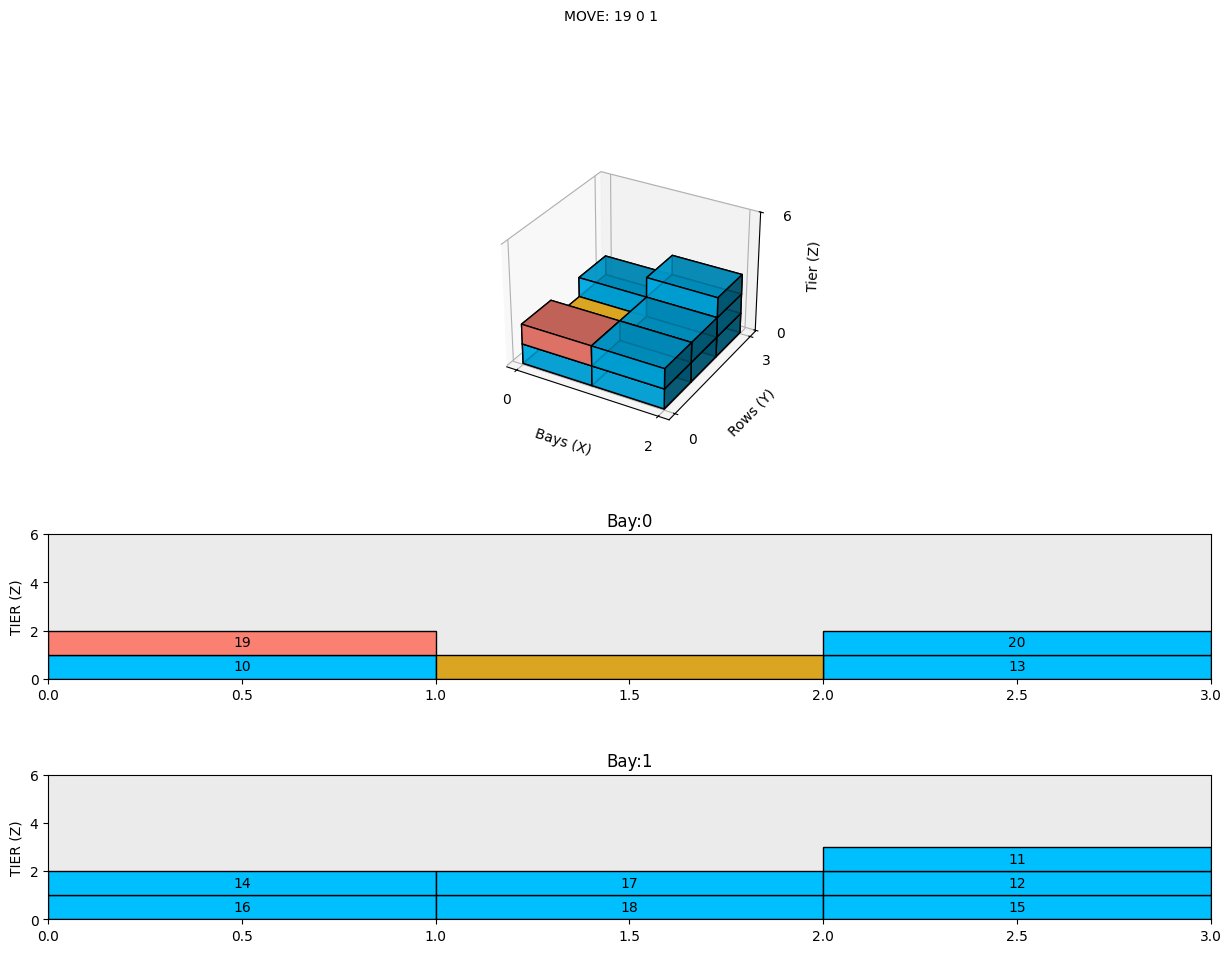

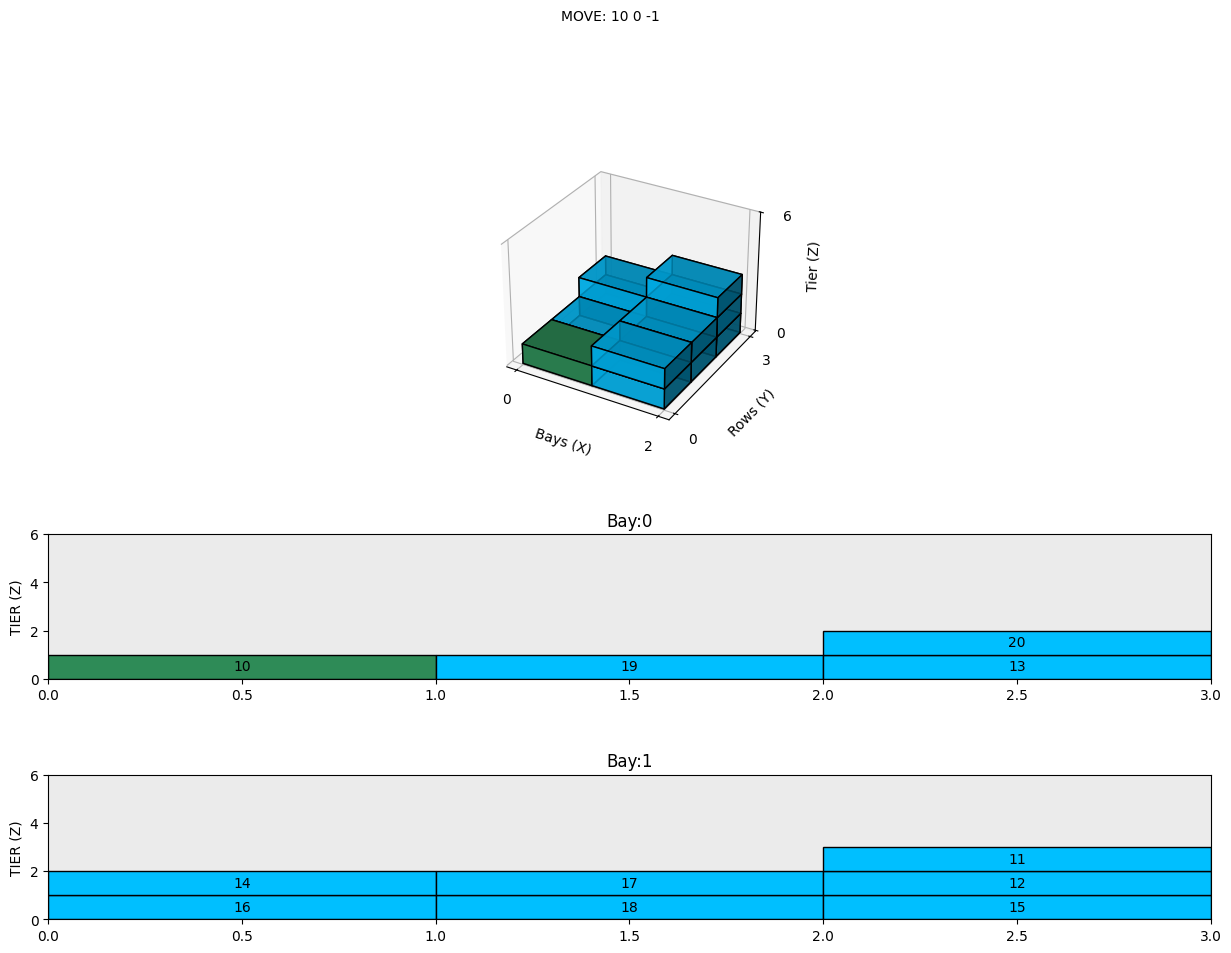

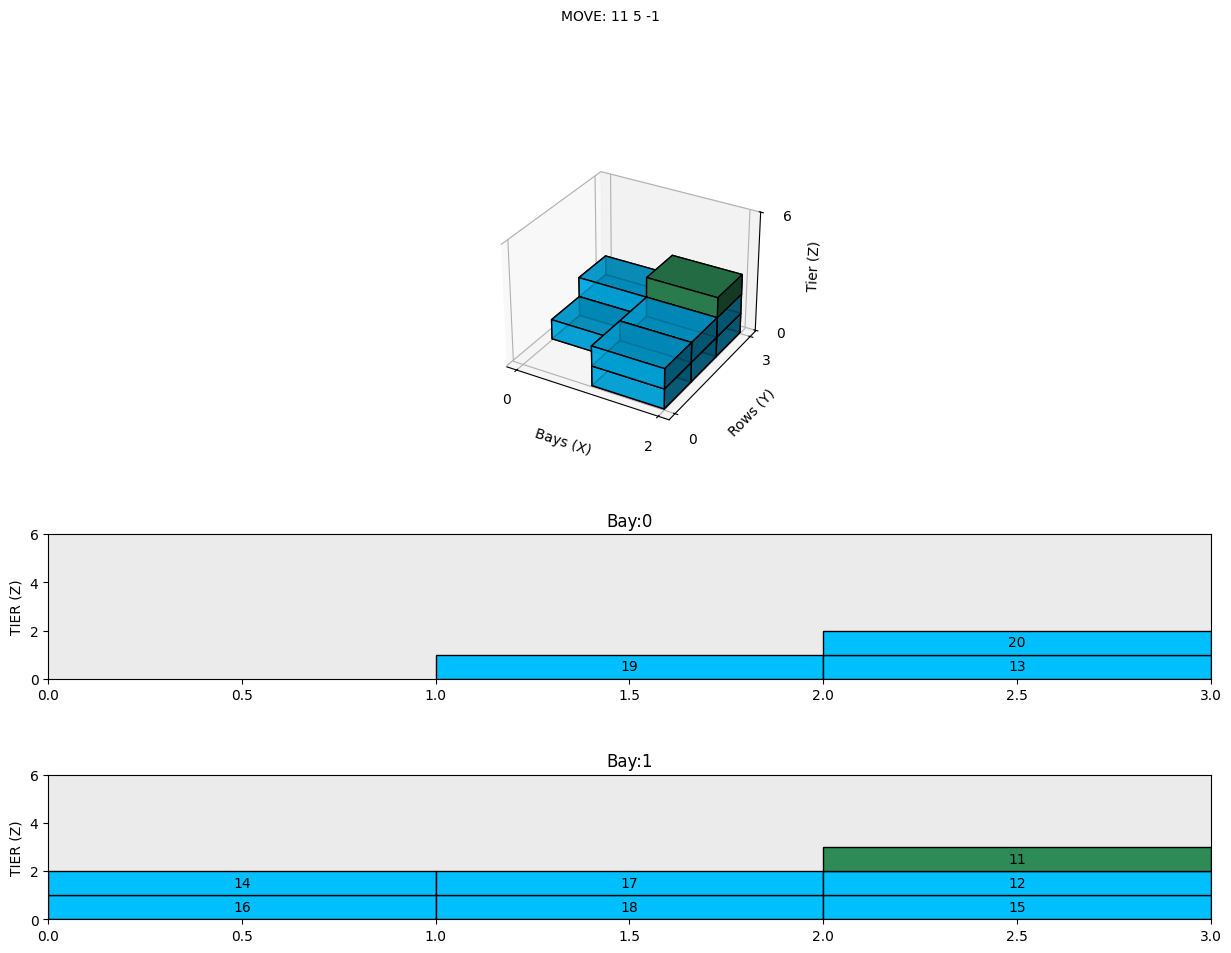

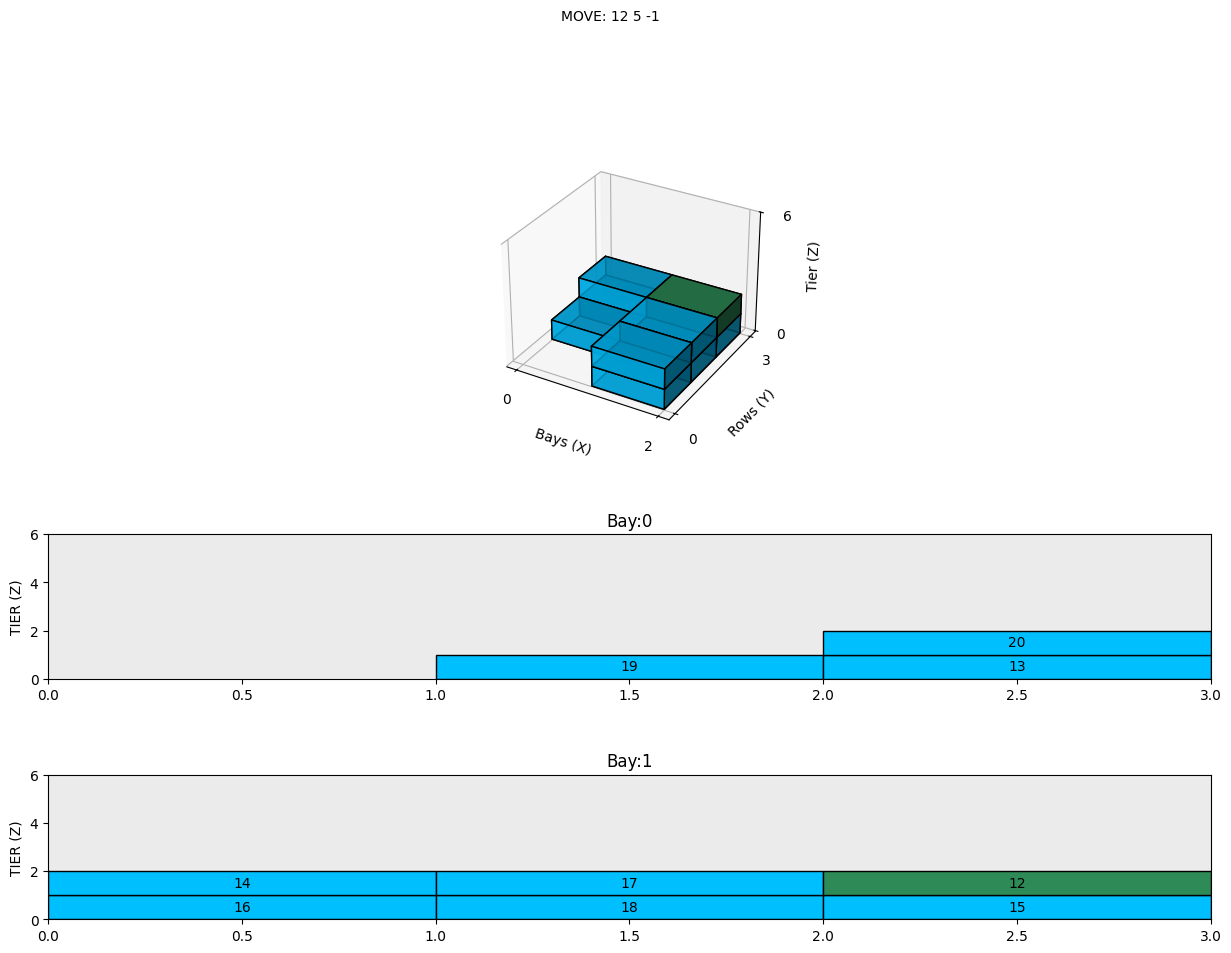

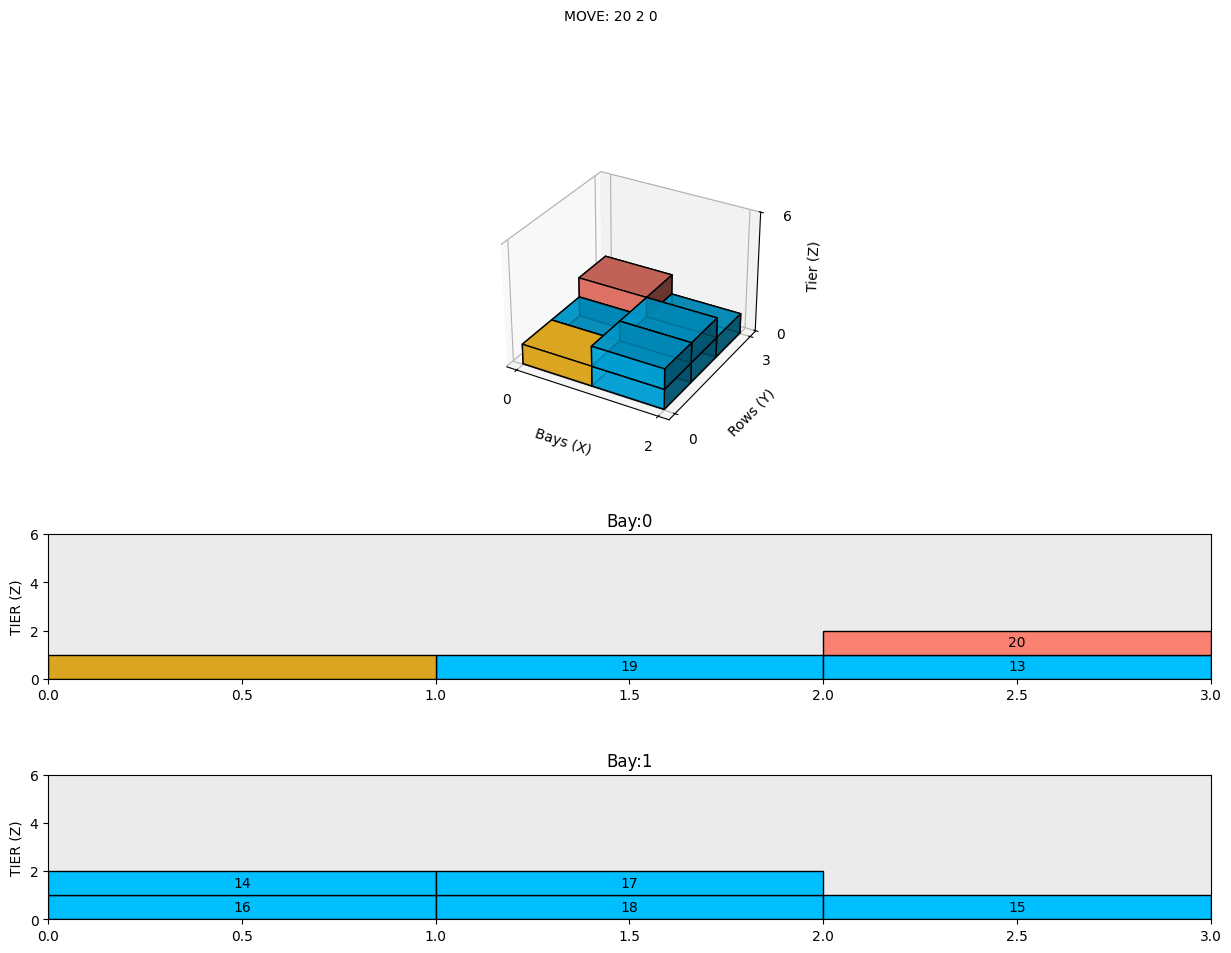

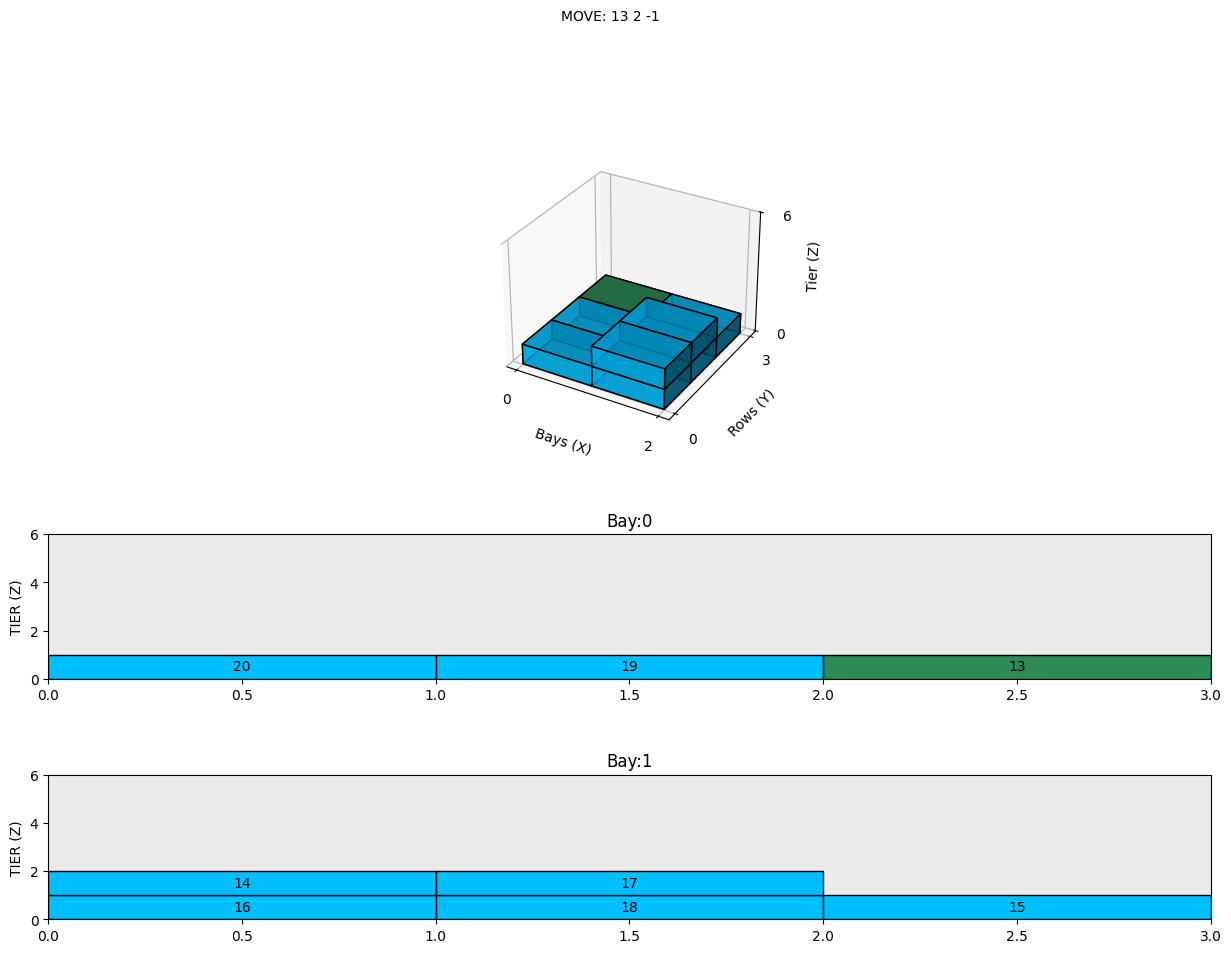

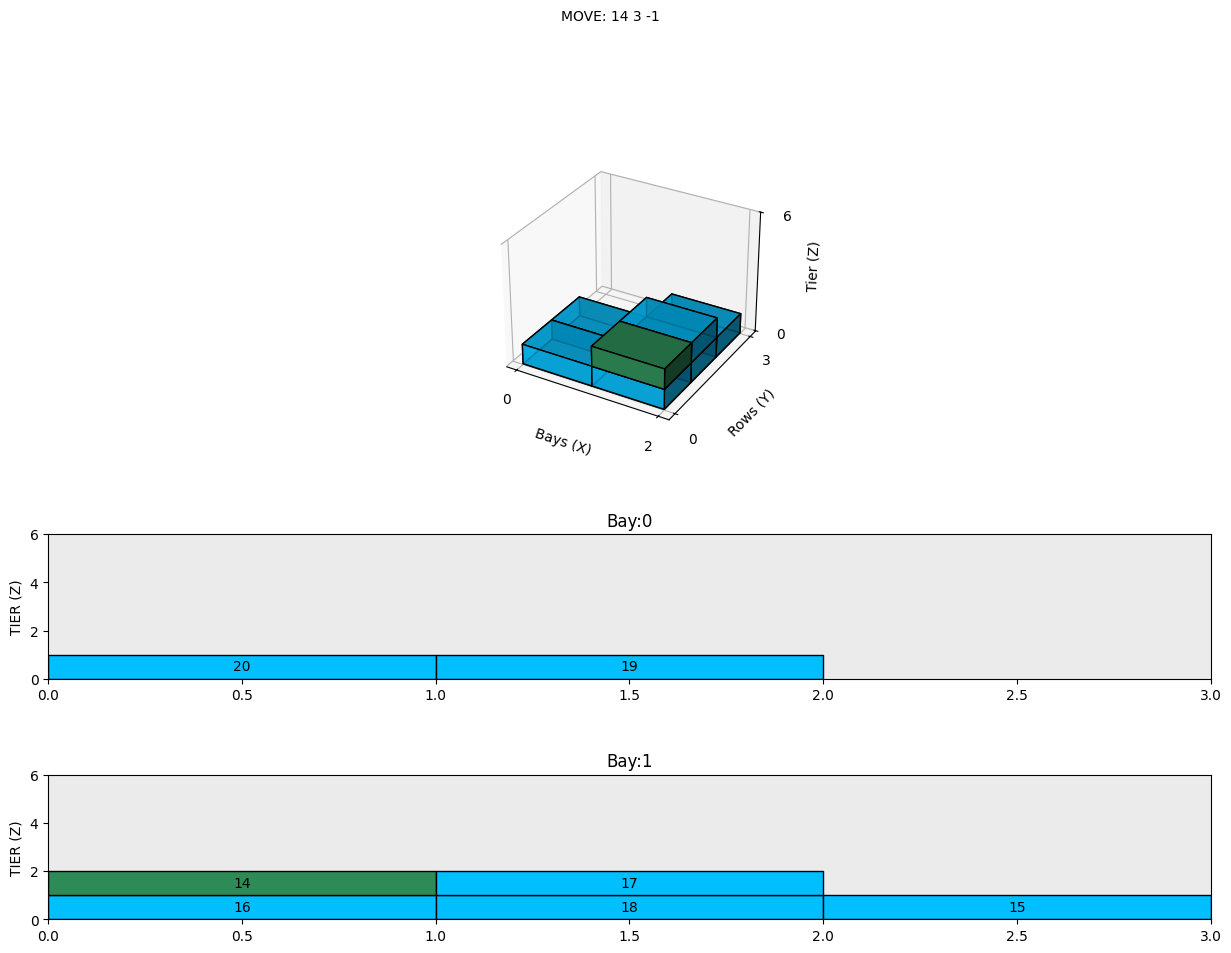

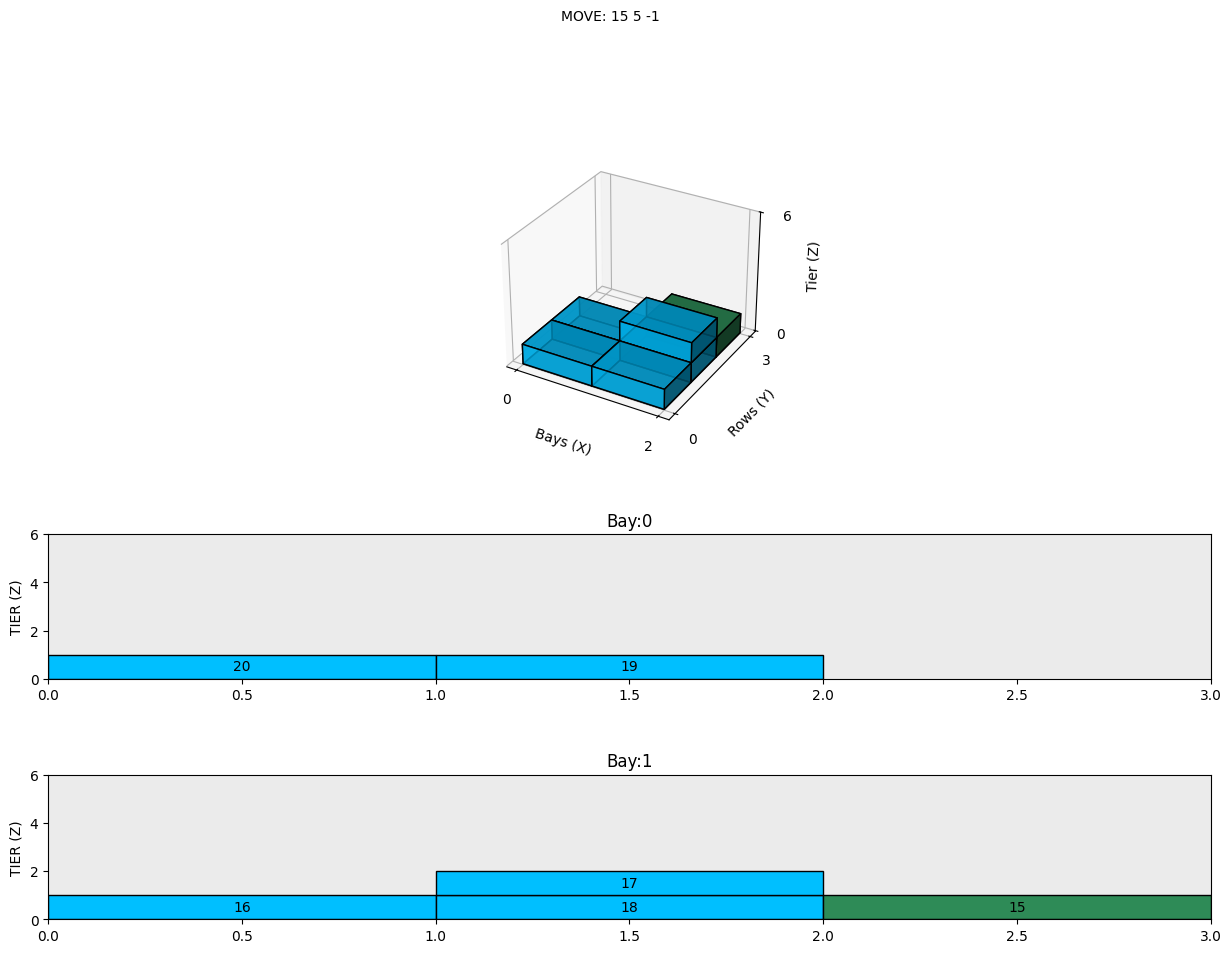

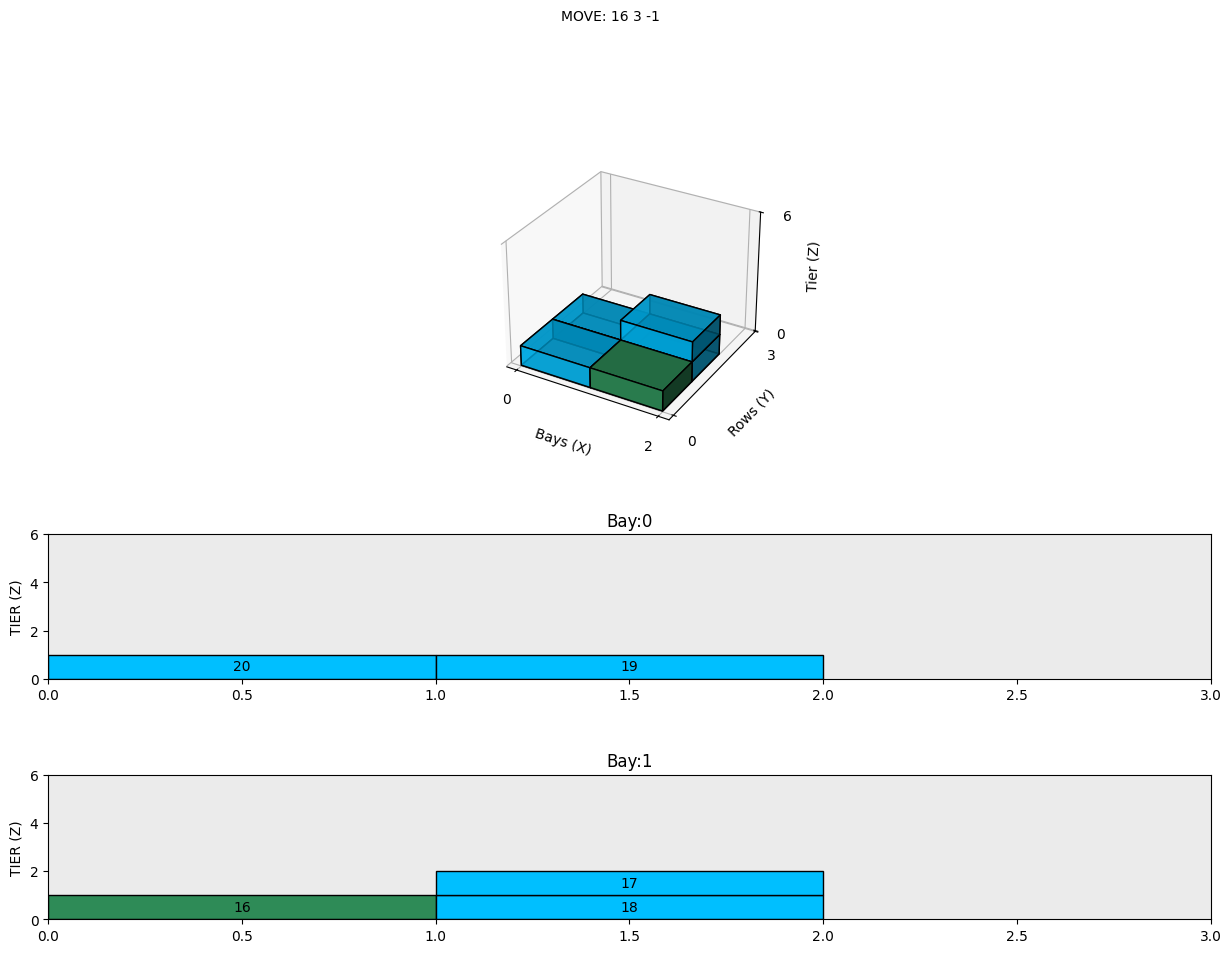

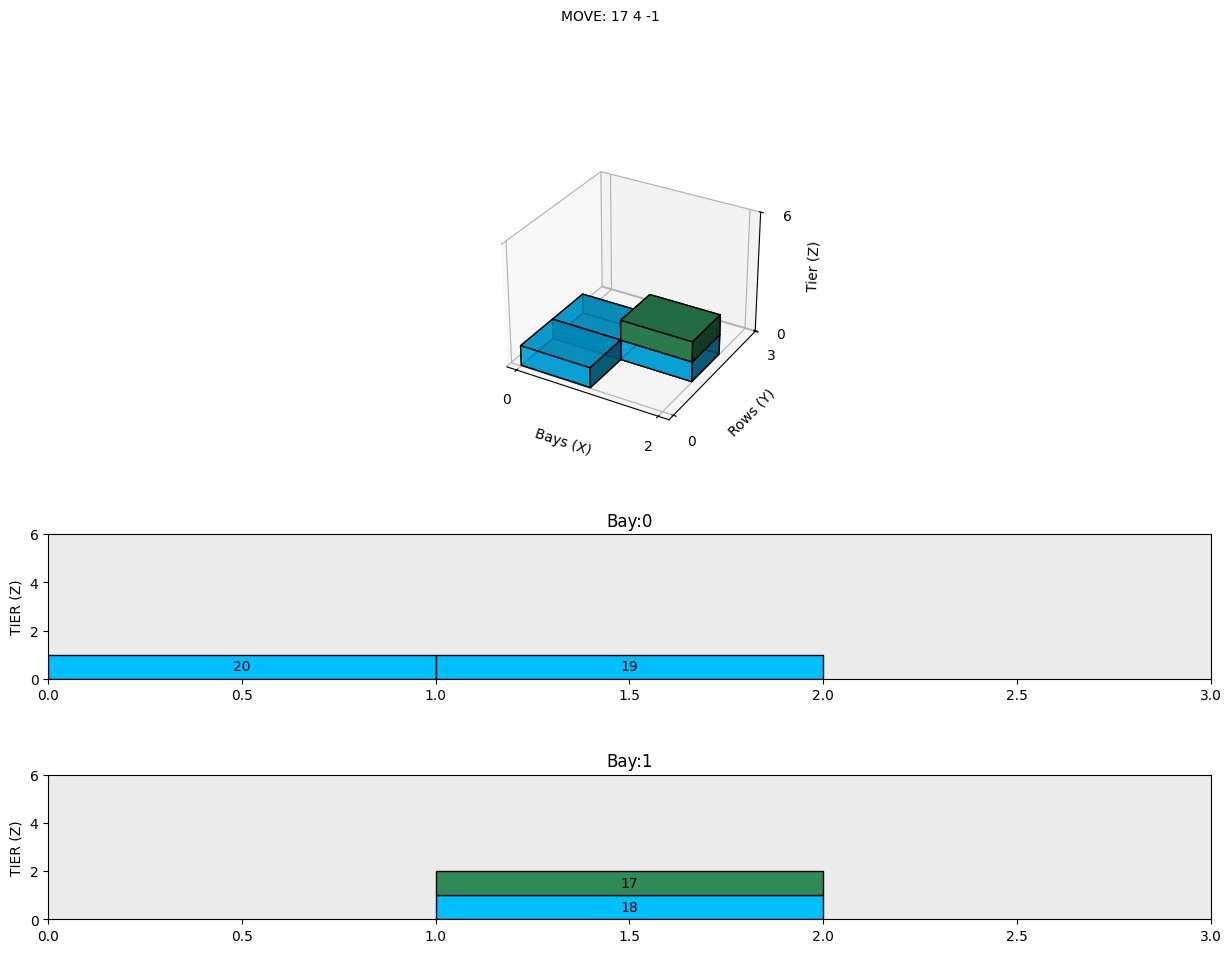

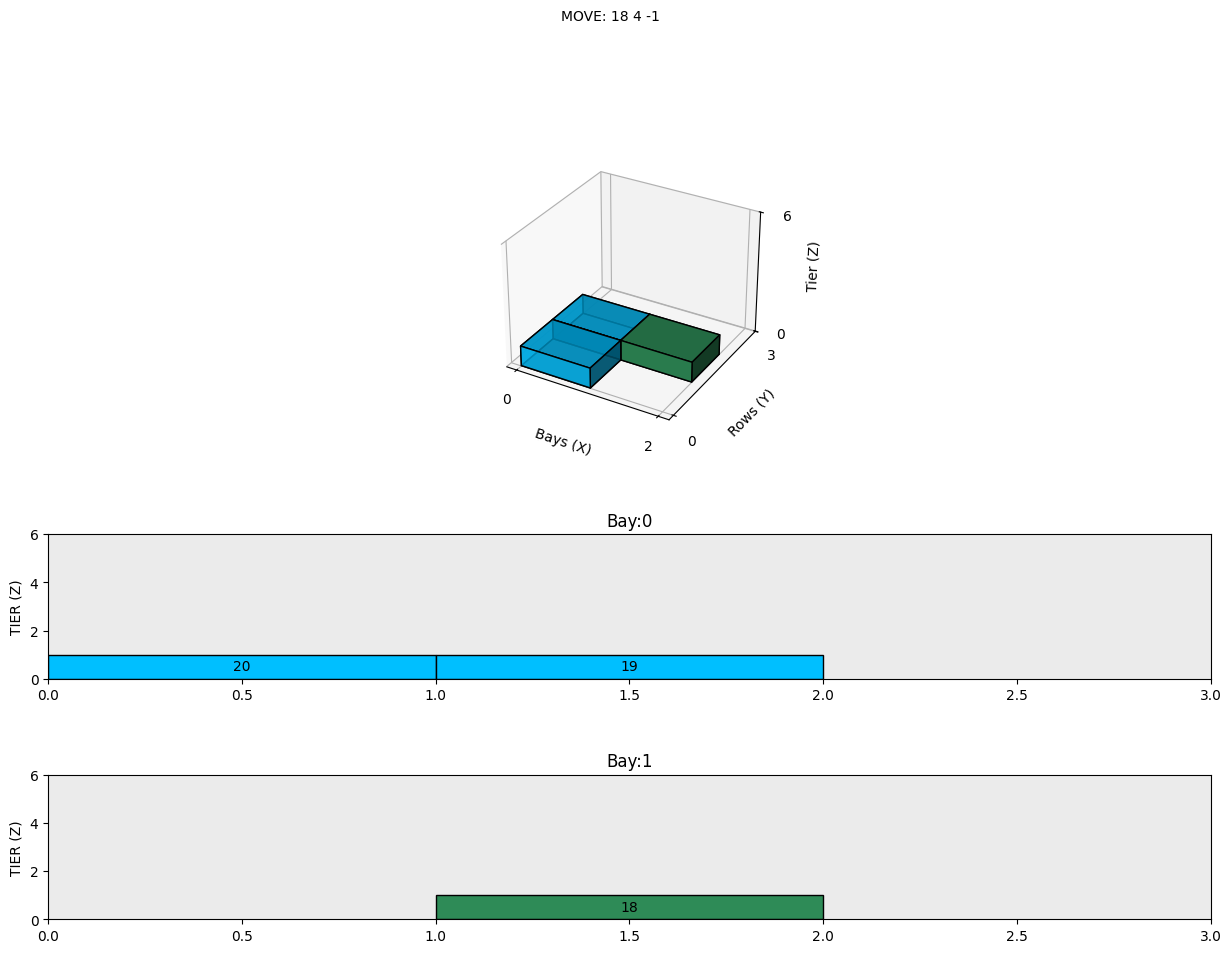

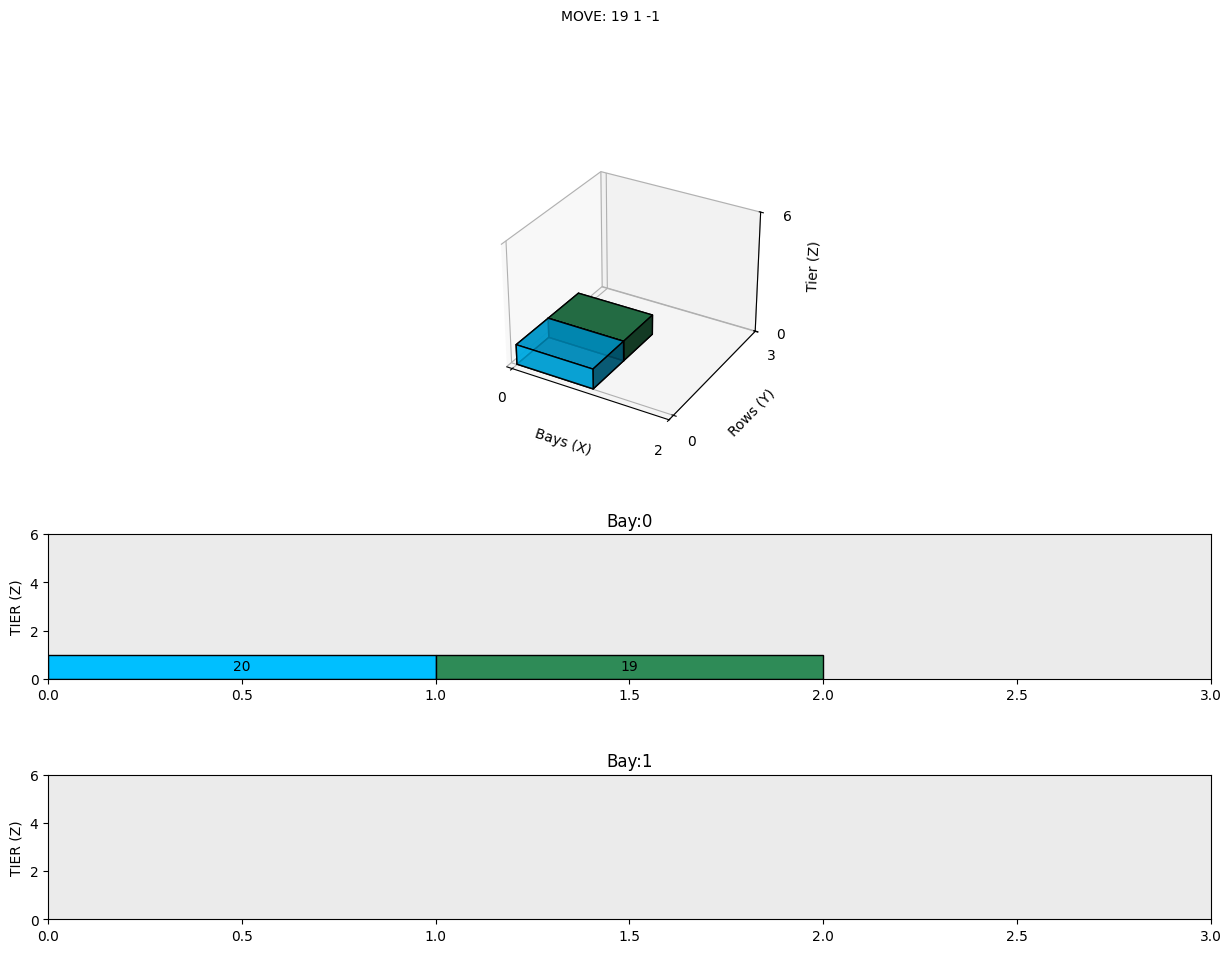

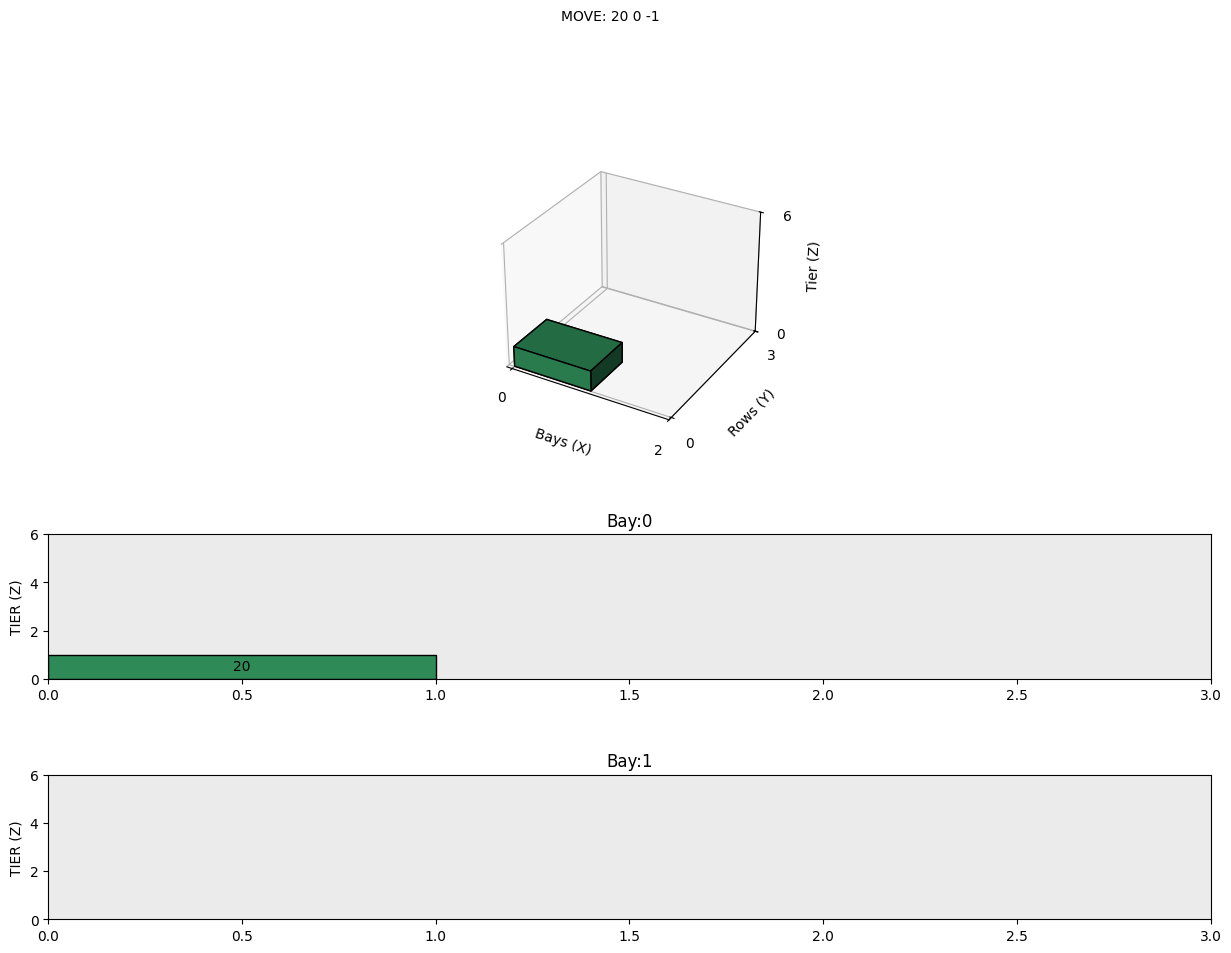

In [18]:
read_instance(random_paths[10])

def read_text(file_name):
    file = open(file_name, "r")

    moves = []
    for line in file:
        data = line.strip().split()
        t = [0,0,0]
        t[0] = int(data[0])
        t[1] = int(data[1])
        t[2] = int(data[2])

        tup = tuple(t)
        moves.append(tup)

    return moves


'''
mov1 = (11, 5, 6)
params = plot_move(mov1)
make_move(params)

mov2 = (1, 4, -1)
params = plot_move(mov2)
make_move(params)
'''
solution = read_text("moves1.txt")
for mov in solution:
    params = plot_move(mov)
    make_move(params)




In [19]:
def show_one_plot(index=0):
    plt.figure(plots[index])
    plt.show()


interact(show_one_plot, index=(0, len(solution)))

interactive(children=(IntSlider(value=0, description='index', max=29), Output()), _dom_classes=('widget-intera…

<function __main__.show_one_plot(index=0)>